### Importing dataset

In [56]:
import pandas as pd

In [57]:
dataTrain = pd.read_csv("Google_Stock_Price_Train.csv")
dataTest = pd.read_csv("Google_Stock_Price_Test.csv")

In [58]:
dataTrain.head()

Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800

In [59]:
dataTrain.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [60]:
dataTest.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Visulizing the dataset

In [61]:
import matplotlib.pyplot as plt

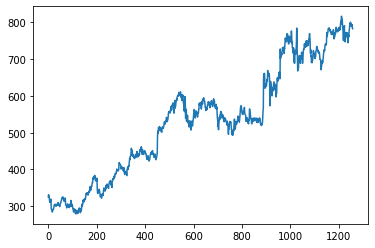

In [62]:
plt.plot(dataTrain.Open)

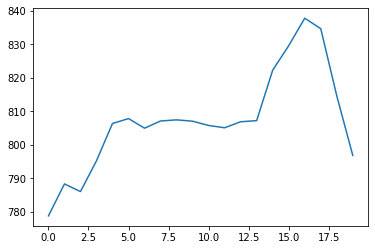

In [63]:
plt.plot(dataTest.Open)

### Extracting dataset for training

In [64]:
dataTrain.iloc[:,1:2].values

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [65]:

training_set = dataTrain.iloc[:,1:2].values

In [66]:
training_set.shape

(1258, 1)

### Feature Scaling

In [67]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [68]:
sc = MinMaxScaler(feature_range=(0,1))

In [69]:
training_set_scaled = sc.fit_transform(training_set)

In [70]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [71]:
len(training_set_scaled)

1258

### Creating data structure with timestampts and output

In [16]:
X_train = []
y_train = []

In [17]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [18]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train[1][-1]

0.08627874097775134

In [20]:
y_train[2]

0.07454051640747084

In [21]:
training_set_scaled[62]

array([0.07454052])

In [22]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [23]:
X_train.shape

(1198, 60)

In [24]:
X_train = np.reshape(X_train, (1198,60,1))

In [25]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Extracting data for test

In [26]:
test_set = dataTest.iloc[:,1:2].values

test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [27]:
dataset_total = pd.concat((dataTrain['Open'], dataTest['Open']), axis = 0)

In [28]:
inputs = dataset_total[len(dataset_total)-len(dataTest)-60:].values

In [29]:
inputs = inputs.reshape(-1,1)

In [30]:
inputs = sc.transform(inputs)

In [31]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

In [32]:
X_test = np.array(X_test)

In [33]:
X_test.shape

(20, 60)

In [34]:
X_test.shape

(20, 60)

In [35]:
X_test = np.reshape(X_test, (20,60, 1))

In [36]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [37]:
X_test1 = np.reshape(X_test[1],(1,60,1))

In [38]:
import numpy as  np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import Model, layers

Using TensorFlow backend.


In [39]:
# Training Parameters
learning_rate = 0.001
training_steps = 1000
batch_size = 20
display_step = 100

In [40]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [41]:
class RNN(Model):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.lstm_layer = layers.LSTM(units=60)
        self.dropout = layers.Dropout(0.1)
        self.out = layers.Dense(1)
        
    
    def call(self, x, is_training=False):
        
        
        x = self.lstm_layer(x)
        x = self.dropout(x)
        x = tf.reshape(x,[20,60,1])
        x = self.lstm_layer(x)
        x = self.dropout(x)
        x = tf.reshape(x,[20,60,1])
        x = self.lstm_layer(x)
        x = self.dropout(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

In [42]:
rnn = RNN()

In [43]:
# Optimization process. 
optimizer = tf.optimizers.Adam(learning_rate)
def train(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = rnn(x, is_training=True)
        # Compute loss.
        loss = loss_func(pred,y)
#         loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = rnn.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update weights following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [51]:
def loss_func( predicted_y, target_y):
    target_y = tf.reshape(target_y, [20,1])
    target_y = tf.dtypes.cast(target_y, tf.double)
    predicted_y = tf.dtypes.cast(predicted_y, tf.double)
    predicted_y = tf.constant(predicted_y)
    target_y = tf.constant(target_y)
    loss = tf.reduce_mean(tf.square(target_y - predicted_y))
    return loss

In [52]:
test_tensor = tf.constant(X_test)

step: 10, loss: 0.001839
step: 20, loss: 0.001861
step: 30, loss: 0.001513
step: 40, loss: 0.000783
step: 50, loss: 0.001977
step: 60, loss: 0.000565
step: 70, loss: 0.001131
step: 80, loss: 0.001233
step: 90, loss: 0.000727
step: 100, loss: 0.001025
Plot after 100 steps


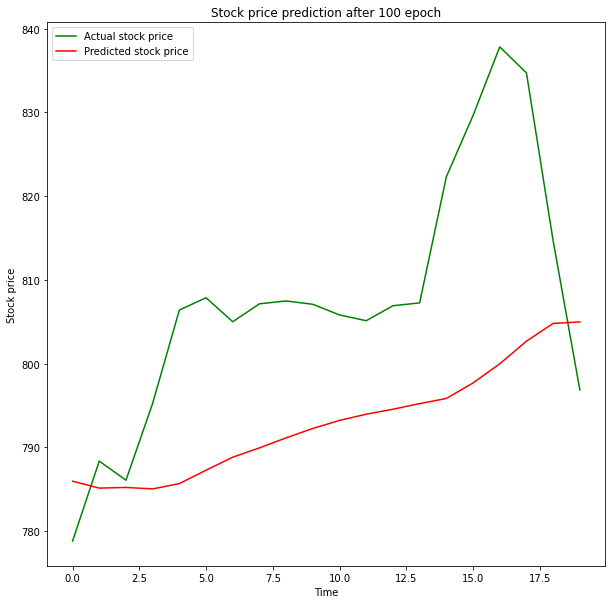

step: 110, loss: 0.000580
step: 120, loss: 0.000676
step: 130, loss: 0.000612
step: 140, loss: 0.000648
step: 150, loss: 0.001136
step: 160, loss: 0.000804
step: 170, loss: 0.000709
step: 180, loss: 0.001244
step: 190, loss: 0.001551
step: 200, loss: 0.001148
Plot after 200 steps


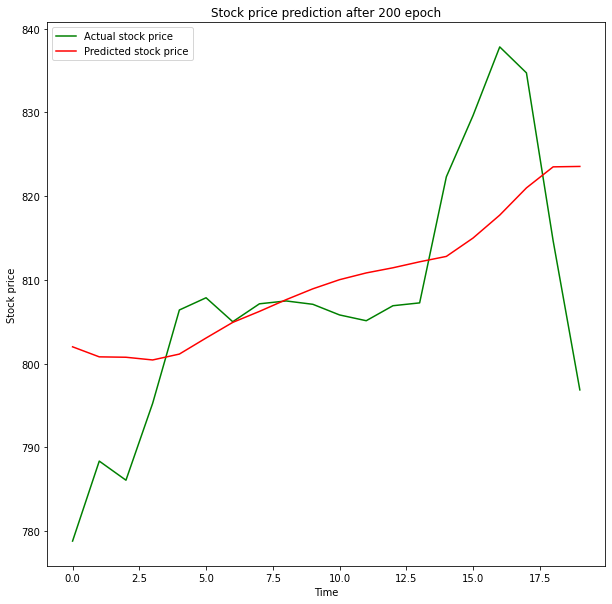

step: 210, loss: 0.000948
step: 220, loss: 0.000979
step: 230, loss: 0.000606
step: 240, loss: 0.000359
step: 250, loss: 0.000306
step: 260, loss: 0.000428
step: 270, loss: 0.000683
step: 280, loss: 0.000526
step: 290, loss: 0.000741
step: 300, loss: 0.001454
Plot after 300 steps


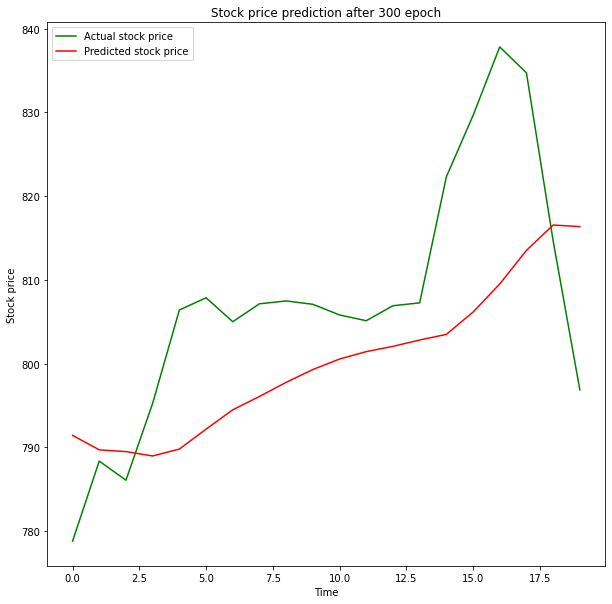

step: 310, loss: 0.000648
step: 320, loss: 0.000462
step: 330, loss: 0.000324
step: 340, loss: 0.000676
step: 350, loss: 0.000710
step: 360, loss: 0.001017
step: 370, loss: 0.000799
step: 380, loss: 0.000464
step: 390, loss: 0.000745
step: 400, loss: 0.000389
Plot after 400 steps


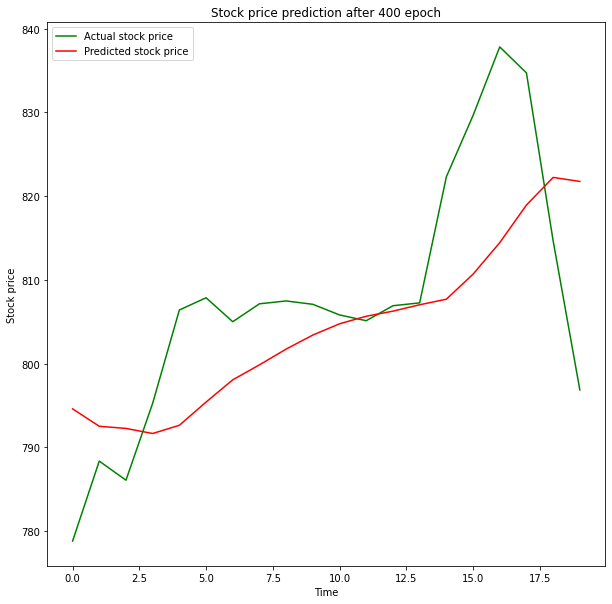

step: 410, loss: 0.002444
step: 420, loss: 0.000457
step: 430, loss: 0.000439
step: 440, loss: 0.000561
step: 450, loss: 0.000287
step: 460, loss: 0.001420
step: 470, loss: 0.000610
step: 480, loss: 0.001314
step: 490, loss: 0.000527
step: 500, loss: 0.001336
Plot after 500 steps


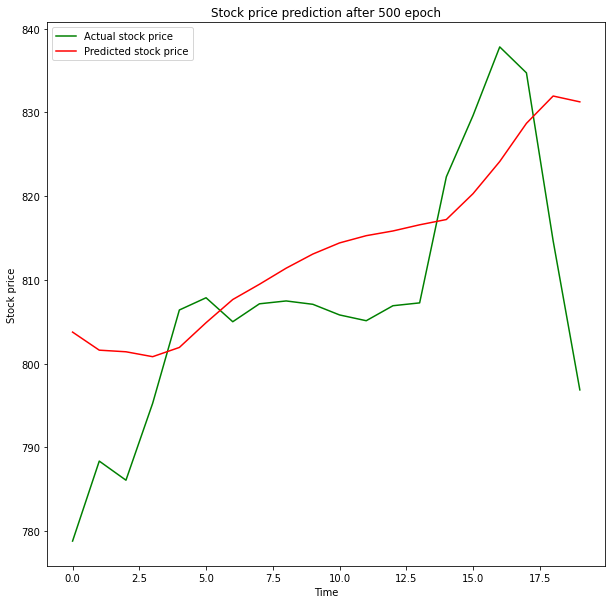

step: 510, loss: 0.000558
step: 520, loss: 0.001538
step: 530, loss: 0.001214
step: 540, loss: 0.000931
step: 550, loss: 0.000713
step: 560, loss: 0.000914
step: 570, loss: 0.000458
step: 580, loss: 0.000303
step: 590, loss: 0.000478
step: 600, loss: 0.000646
Plot after 600 steps


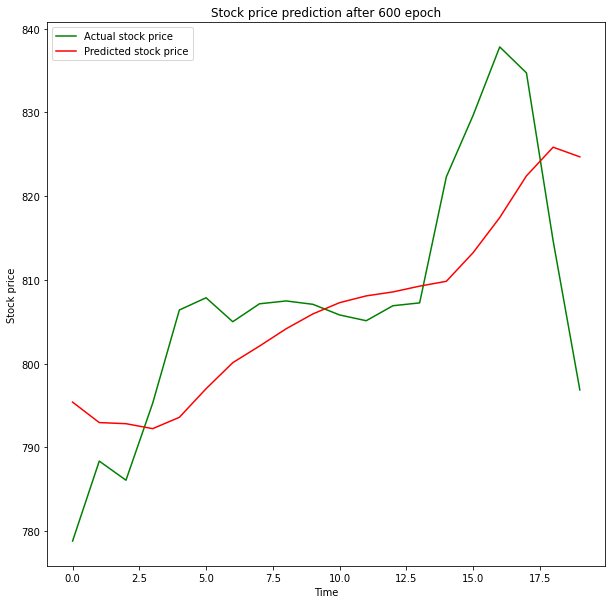

step: 610, loss: 0.000514
step: 620, loss: 0.000421
step: 630, loss: 0.000558
step: 640, loss: 0.000440
step: 650, loss: 0.002244
step: 660, loss: 0.002324
step: 670, loss: 0.000514
step: 680, loss: 0.000671
step: 690, loss: 0.000355
step: 700, loss: 0.001760
Plot after 700 steps


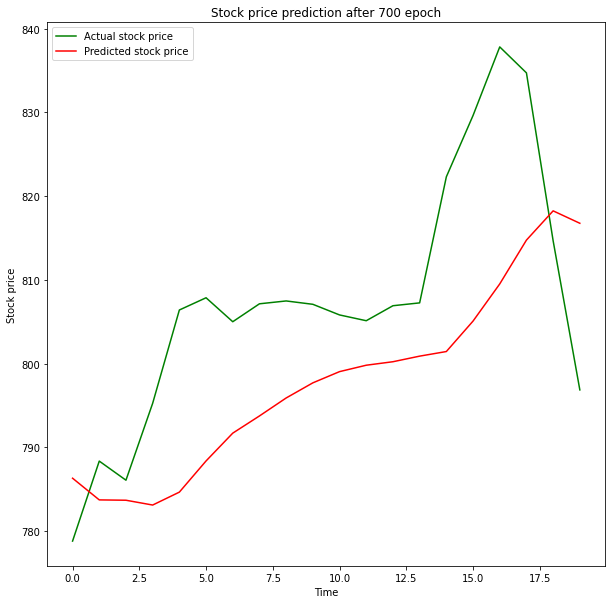

step: 710, loss: 0.000742
step: 720, loss: 0.000533
step: 730, loss: 0.000830
step: 740, loss: 0.000515
step: 750, loss: 0.001270
step: 760, loss: 0.000449
step: 770, loss: 0.001768
step: 780, loss: 0.000501
step: 790, loss: 0.000854
step: 800, loss: 0.000647
Plot after 800 steps


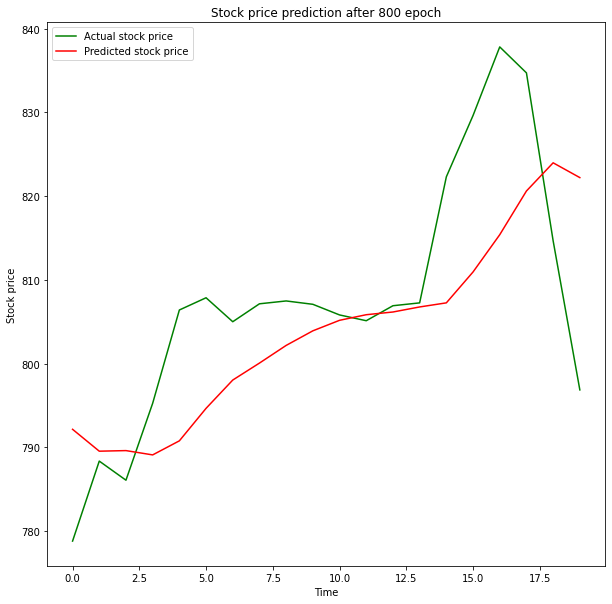

step: 810, loss: 0.000531
step: 820, loss: 0.000317
step: 830, loss: 0.000393
step: 840, loss: 0.000166
step: 850, loss: 0.000292
step: 860, loss: 0.000481
step: 870, loss: 0.000348
step: 880, loss: 0.000939
step: 890, loss: 0.000529
step: 900, loss: 0.000646
Plot after 900 steps


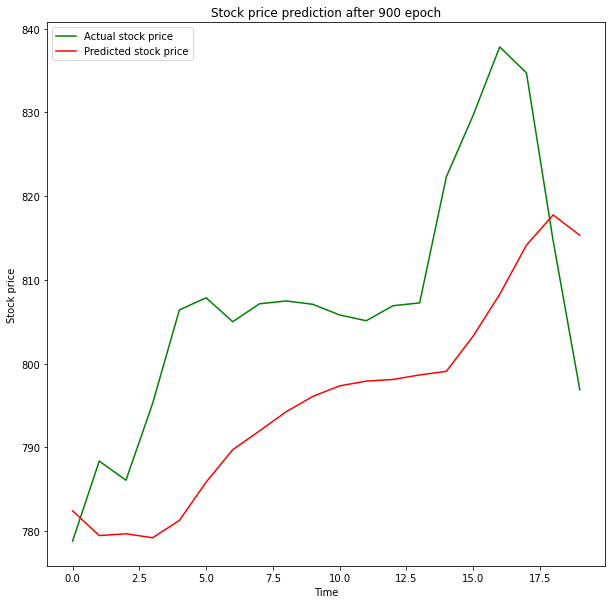

step: 910, loss: 0.000636
step: 920, loss: 0.001280
step: 930, loss: 0.000356
step: 940, loss: 0.000463
step: 950, loss: 0.000738
step: 960, loss: 0.000406
step: 970, loss: 0.000577
step: 980, loss: 0.000674
step: 990, loss: 0.000410
step: 1000, loss: 0.000201
Plot after 1000 steps


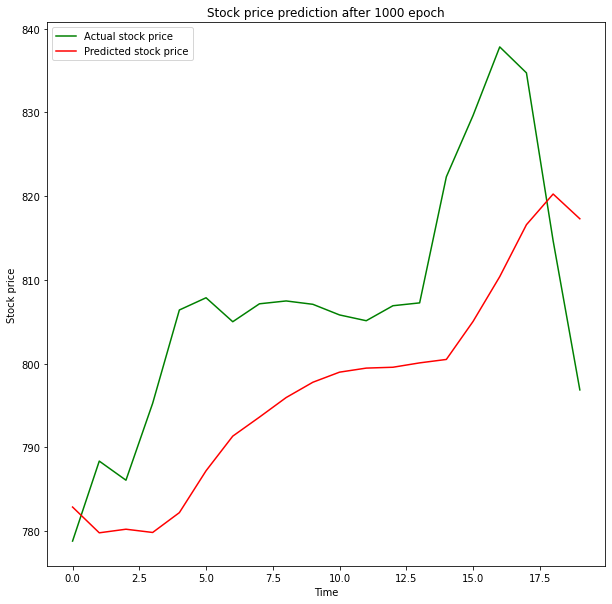

step: 1010, loss: 0.000228
step: 1020, loss: 0.000306
step: 1030, loss: 0.000367
step: 1040, loss: 0.000419
step: 1050, loss: 0.000238
step: 1060, loss: 0.000371
step: 1070, loss: 0.000230
step: 1080, loss: 0.000378
step: 1090, loss: 0.000297
step: 1100, loss: 0.000302
Plot after 1100 steps


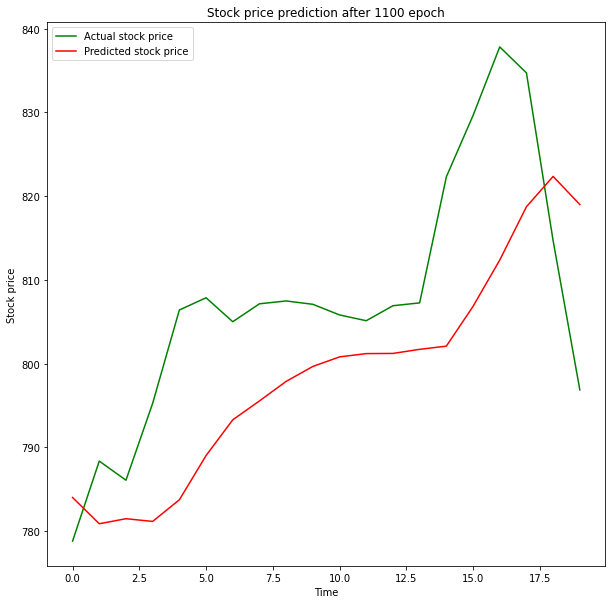

step: 1110, loss: 0.000560
step: 1120, loss: 0.000780
step: 1130, loss: 0.001125
step: 1140, loss: 0.000667
step: 1150, loss: 0.000356
step: 1160, loss: 0.000232
step: 1170, loss: 0.000330
step: 1180, loss: 0.000477
step: 1190, loss: 0.000388
step: 1200, loss: 0.000384
Plot after 1200 steps


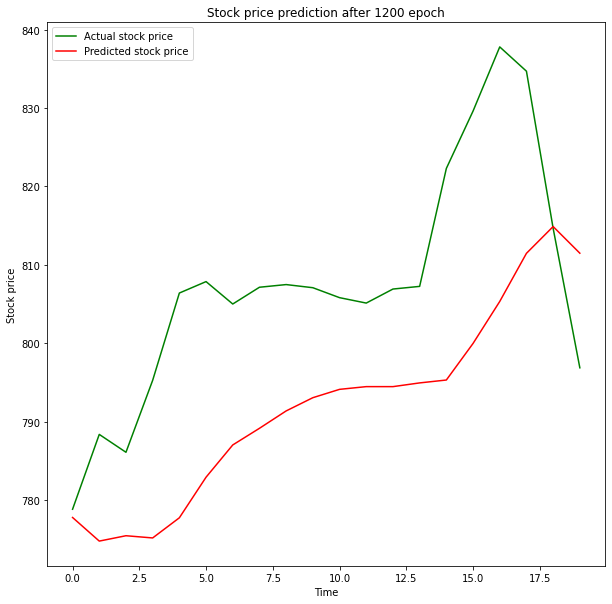

step: 1210, loss: 0.000278
step: 1220, loss: 0.000388
step: 1230, loss: 0.000412
step: 1240, loss: 0.000632
step: 1250, loss: 0.001055
step: 1260, loss: 0.000895
step: 1270, loss: 0.000170
step: 1280, loss: 0.000403
step: 1290, loss: 0.000670
step: 1300, loss: 0.000974
Plot after 1300 steps


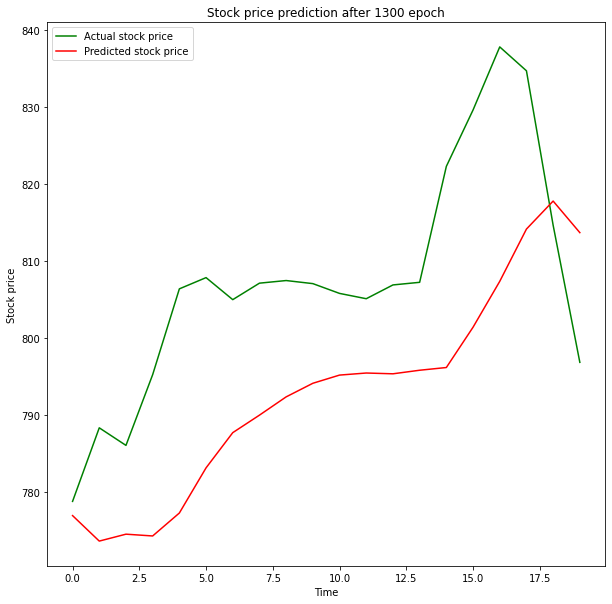

step: 1310, loss: 0.000458
step: 1320, loss: 0.000265
step: 1330, loss: 0.002187
step: 1340, loss: 0.000400
step: 1350, loss: 0.000611
step: 1360, loss: 0.000205
step: 1370, loss: 0.000415
step: 1380, loss: 0.000388
step: 1390, loss: 0.000222
step: 1400, loss: 0.000550
Plot after 1400 steps


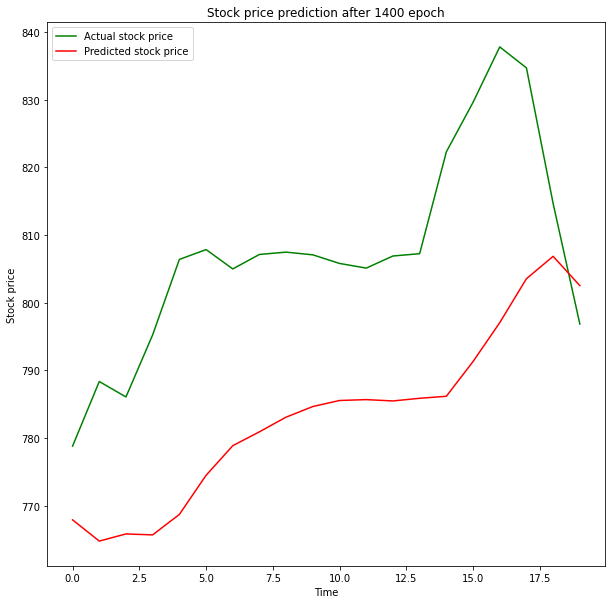

step: 1410, loss: 0.001318
step: 1420, loss: 0.000249
step: 1430, loss: 0.000321
step: 1440, loss: 0.000339
step: 1450, loss: 0.000578
step: 1460, loss: 0.000436
step: 1470, loss: 0.000456
step: 1480, loss: 0.000232
step: 1490, loss: 0.000319
step: 1500, loss: 0.000616
Plot after 1500 steps


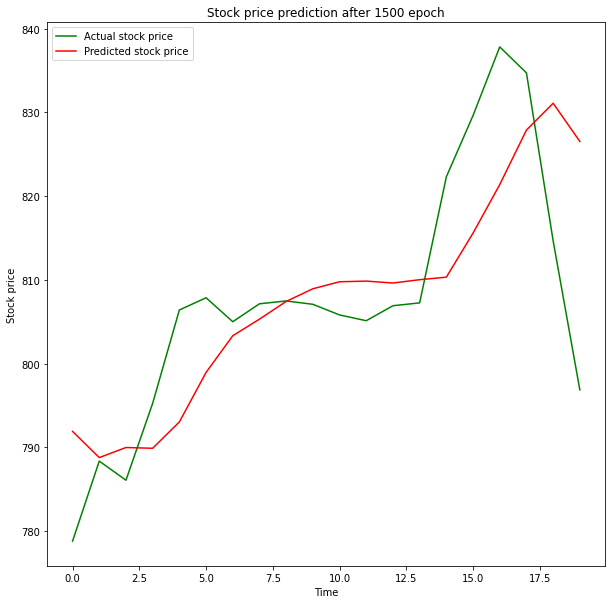

step: 1510, loss: 0.001405
step: 1520, loss: 0.000286
step: 1530, loss: 0.000161
step: 1540, loss: 0.000581
step: 1550, loss: 0.000239
step: 1560, loss: 0.000246
step: 1570, loss: 0.000706
step: 1580, loss: 0.000272
step: 1590, loss: 0.000419
step: 1600, loss: 0.000357
Plot after 1600 steps


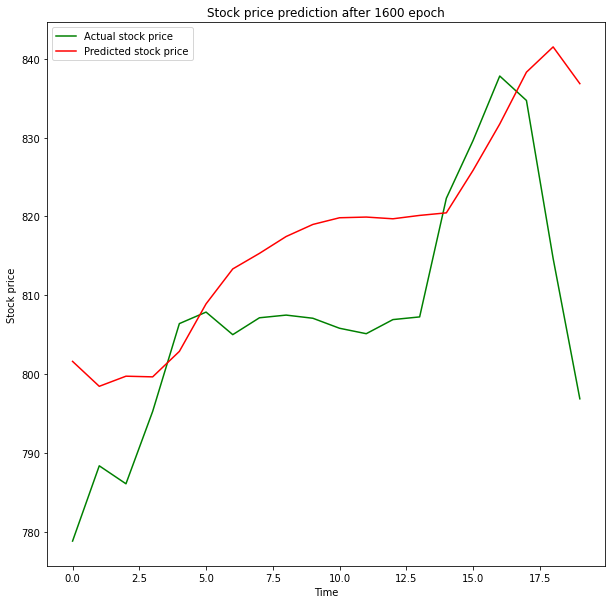

step: 1610, loss: 0.001168
step: 1620, loss: 0.001937
step: 1630, loss: 0.000136
step: 1640, loss: 0.000422
step: 1650, loss: 0.000368
step: 1660, loss: 0.000483
step: 1670, loss: 0.000665
step: 1680, loss: 0.001269
step: 1690, loss: 0.001413
step: 1700, loss: 0.000332
Plot after 1700 steps


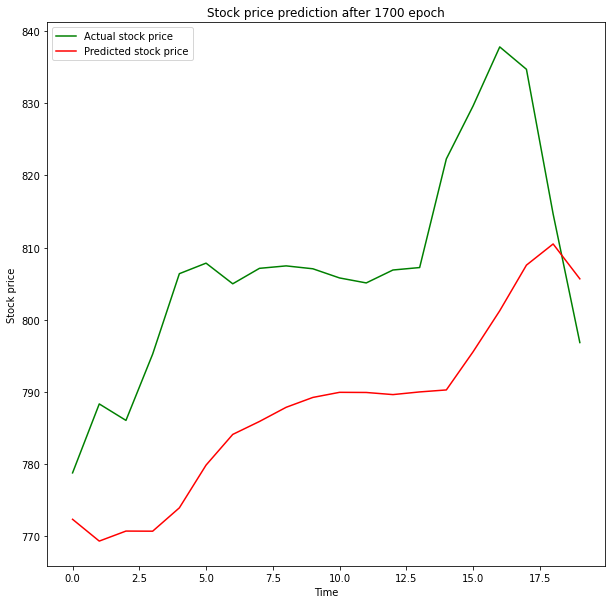

step: 1710, loss: 0.002210
step: 1720, loss: 0.000334
step: 1730, loss: 0.000817
step: 1740, loss: 0.000174
step: 1750, loss: 0.000267
step: 1760, loss: 0.000544
step: 1770, loss: 0.000164
step: 1780, loss: 0.000231
step: 1790, loss: 0.000959
step: 1800, loss: 0.000733
Plot after 1800 steps


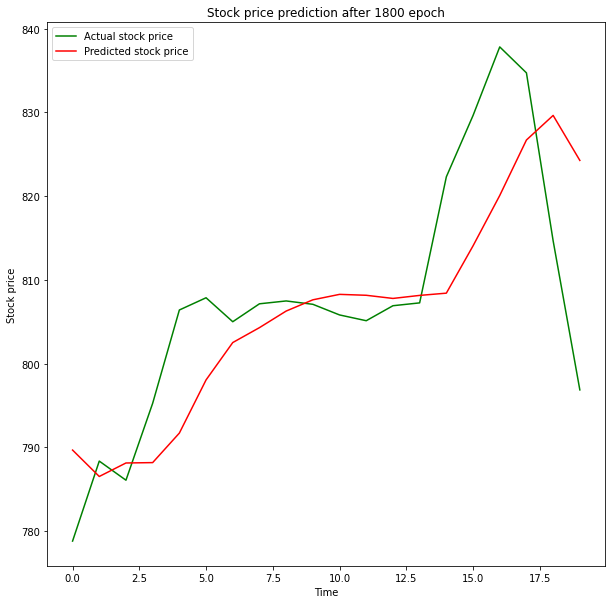

step: 1810, loss: 0.000250
step: 1820, loss: 0.001563
step: 1830, loss: 0.000669
step: 1840, loss: 0.000470
step: 1850, loss: 0.000710
step: 1860, loss: 0.000531
step: 1870, loss: 0.001375
step: 1880, loss: 0.000754
step: 1890, loss: 0.000340
step: 1900, loss: 0.000556
Plot after 1900 steps


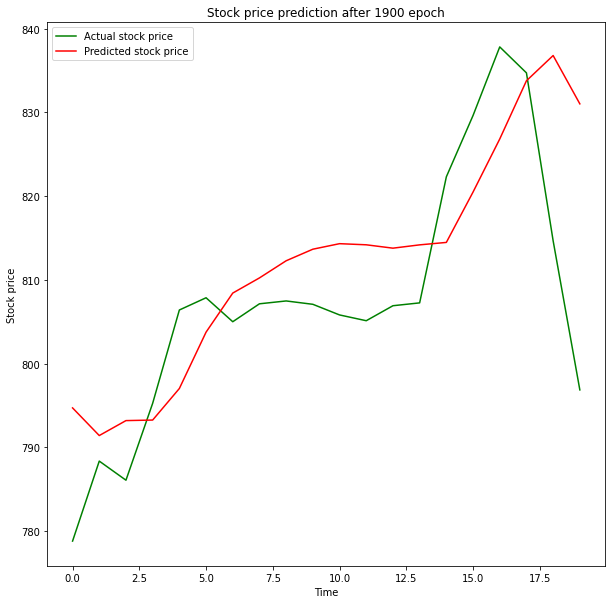

step: 1910, loss: 0.000511
step: 1920, loss: 0.000408
step: 1930, loss: 0.000151
step: 1940, loss: 0.000721
step: 1950, loss: 0.000677
step: 1960, loss: 0.000155
step: 1970, loss: 0.000614
step: 1980, loss: 0.000602
step: 1990, loss: 0.000422
step: 2000, loss: 0.000488
Plot after 2000 steps


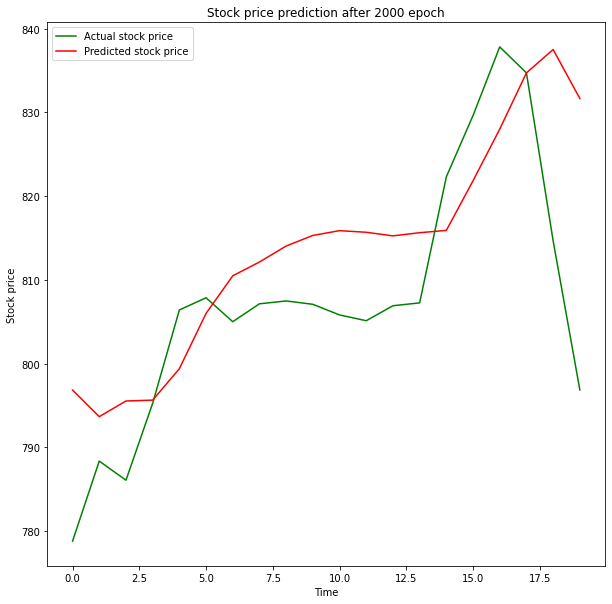

step: 2010, loss: 0.000569
step: 2020, loss: 0.000195
step: 2030, loss: 0.000220
step: 2040, loss: 0.000166
step: 2050, loss: 0.000176
step: 2060, loss: 0.000193
step: 2070, loss: 0.000645
step: 2080, loss: 0.000279
step: 2090, loss: 0.000327
step: 2100, loss: 0.001269
Plot after 2100 steps


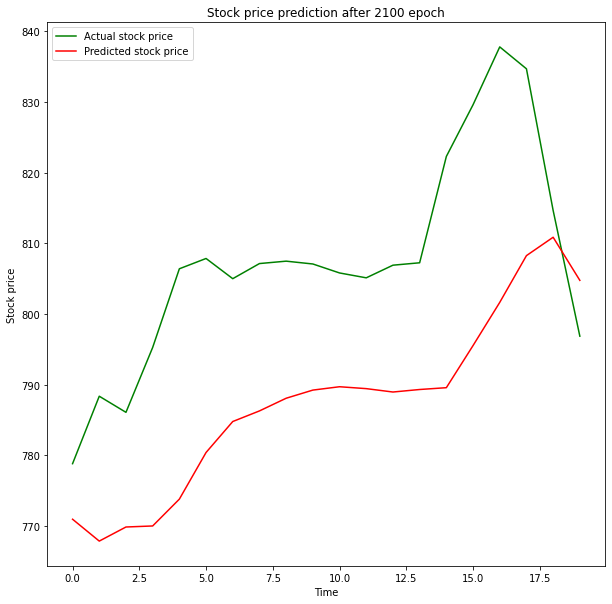

step: 2110, loss: 0.000460
step: 2120, loss: 0.000418
step: 2130, loss: 0.000418
step: 2140, loss: 0.000210
step: 2150, loss: 0.000675
step: 2160, loss: 0.000598
step: 2170, loss: 0.000303
step: 2180, loss: 0.000318
step: 2190, loss: 0.000299
step: 2200, loss: 0.000218
Plot after 2200 steps


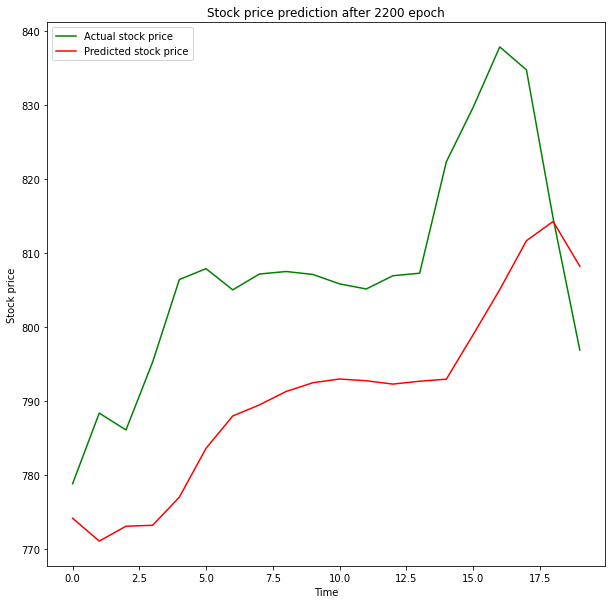

step: 2210, loss: 0.000270
step: 2220, loss: 0.000122
step: 2230, loss: 0.000328
step: 2240, loss: 0.001471
step: 2250, loss: 0.000245
step: 2260, loss: 0.000140
step: 2270, loss: 0.000511
step: 2280, loss: 0.000605
step: 2290, loss: 0.000379
step: 2300, loss: 0.000807
Plot after 2300 steps


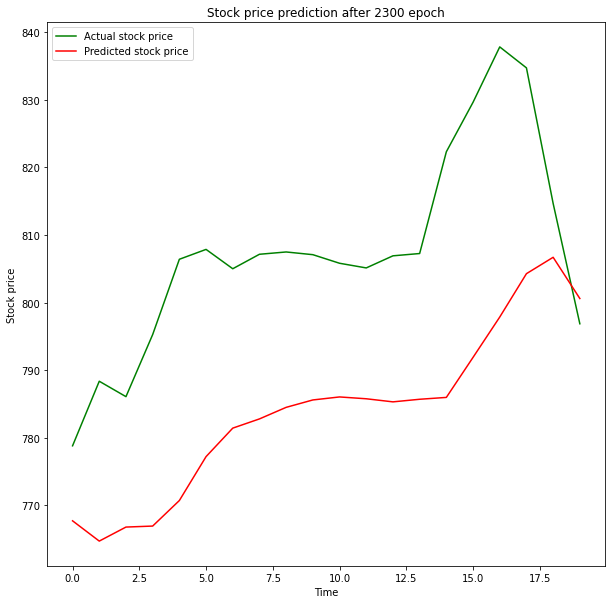

step: 2310, loss: 0.000484
step: 2320, loss: 0.000543
step: 2330, loss: 0.000196
step: 2340, loss: 0.000404
step: 2350, loss: 0.000253
step: 2360, loss: 0.000130
step: 2370, loss: 0.000667
step: 2380, loss: 0.000278
step: 2390, loss: 0.000306
step: 2400, loss: 0.000980
Plot after 2400 steps


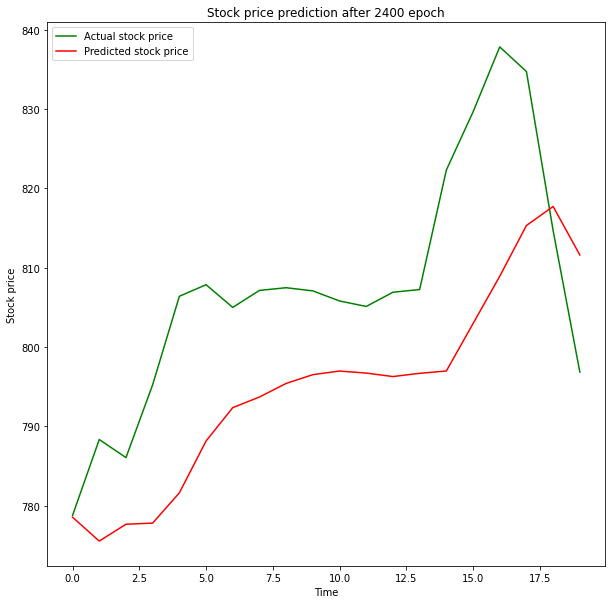

step: 2410, loss: 0.000614
step: 2420, loss: 0.000441
step: 2430, loss: 0.000253
step: 2440, loss: 0.000110
step: 2450, loss: 0.000241
step: 2460, loss: 0.000118
step: 2470, loss: 0.000428
step: 2480, loss: 0.000225
step: 2490, loss: 0.000785
step: 2500, loss: 0.000292
Plot after 2500 steps


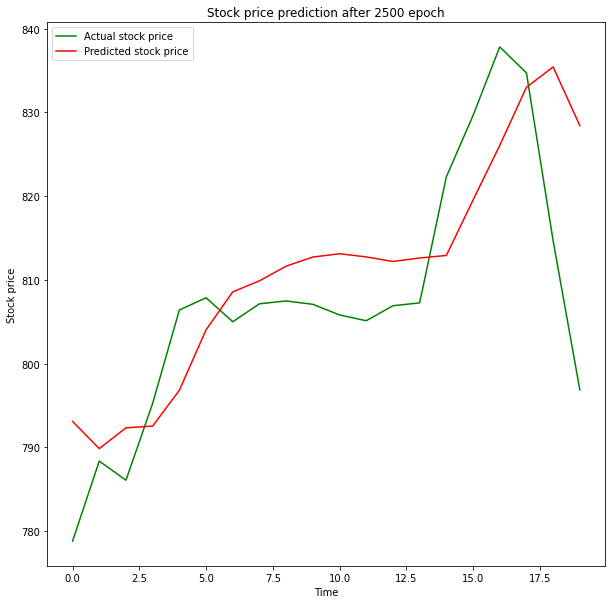

step: 2510, loss: 0.000296
step: 2520, loss: 0.000580
step: 2530, loss: 0.000383
step: 2540, loss: 0.000263
step: 2550, loss: 0.000297
step: 2560, loss: 0.000266
step: 2570, loss: 0.000465
step: 2580, loss: 0.000207
step: 2590, loss: 0.000486
step: 2600, loss: 0.000841
Plot after 2600 steps


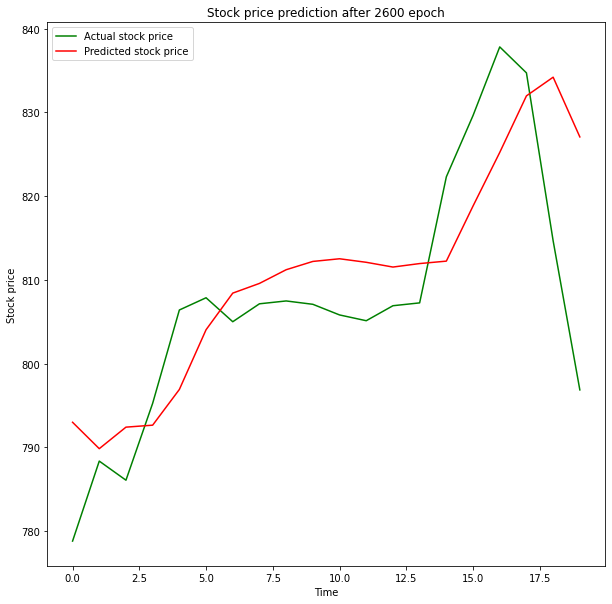

step: 2610, loss: 0.000320
step: 2620, loss: 0.000402
step: 2630, loss: 0.000718
step: 2640, loss: 0.000425
step: 2650, loss: 0.000907
step: 2660, loss: 0.000182
step: 2670, loss: 0.000181
step: 2680, loss: 0.000600
step: 2690, loss: 0.000482
step: 2700, loss: 0.000479
Plot after 2700 steps


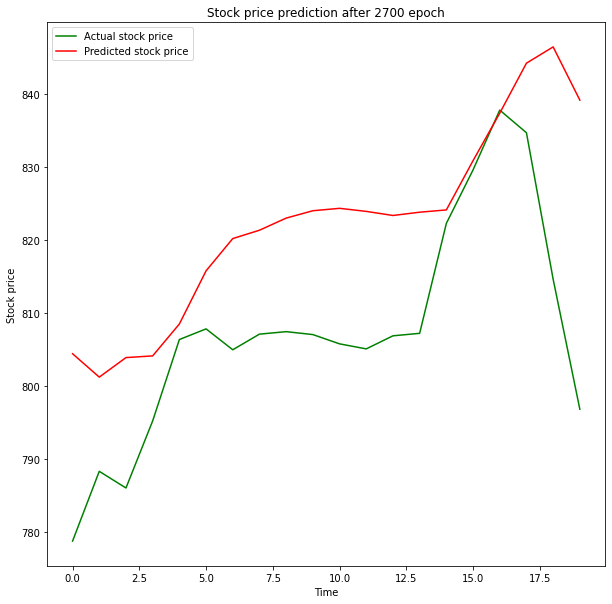

step: 2710, loss: 0.001711
step: 2720, loss: 0.000474
step: 2730, loss: 0.000234
step: 2740, loss: 0.000373
step: 2750, loss: 0.000301
step: 2760, loss: 0.000258
step: 2770, loss: 0.000220
step: 2780, loss: 0.000262
step: 2790, loss: 0.000698
step: 2800, loss: 0.000577
Plot after 2800 steps


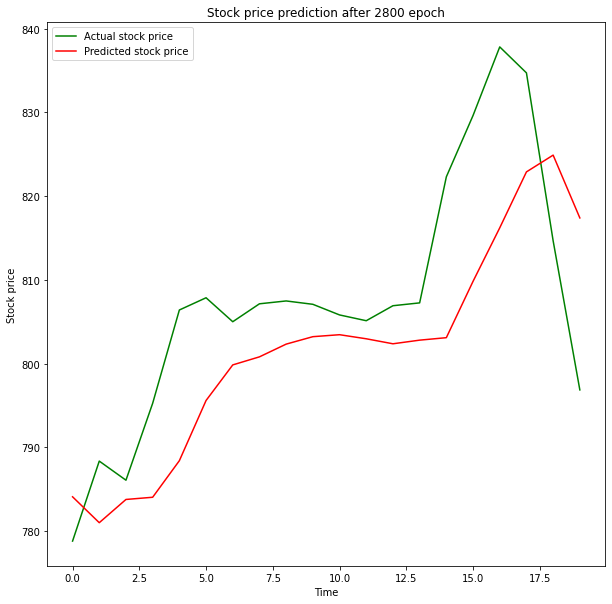

step: 2810, loss: 0.000721
step: 2820, loss: 0.000513
step: 2830, loss: 0.001049
step: 2840, loss: 0.000848
step: 2850, loss: 0.000455
step: 2860, loss: 0.000501
step: 2870, loss: 0.000292
step: 2880, loss: 0.000231
step: 2890, loss: 0.000716
step: 2900, loss: 0.001203
Plot after 2900 steps


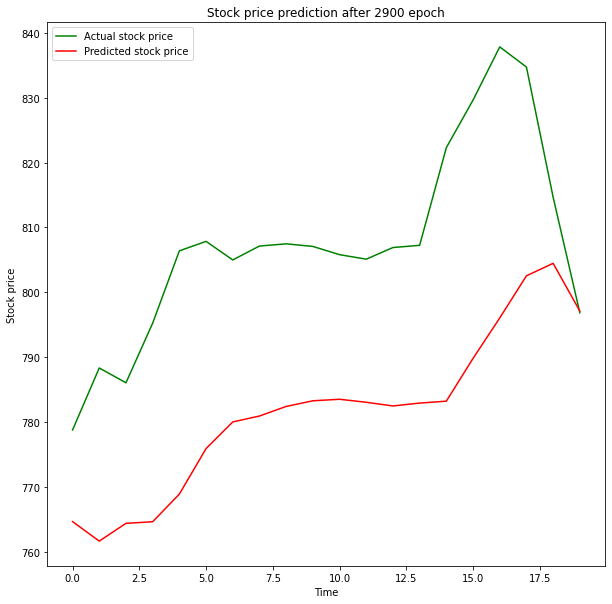

step: 2910, loss: 0.000879
step: 2920, loss: 0.000291
step: 2930, loss: 0.000469
step: 2940, loss: 0.000311
step: 2950, loss: 0.000379
step: 2960, loss: 0.001790
step: 2970, loss: 0.000278
step: 2980, loss: 0.000404
step: 2990, loss: 0.000334
step: 3000, loss: 0.000303
Plot after 3000 steps


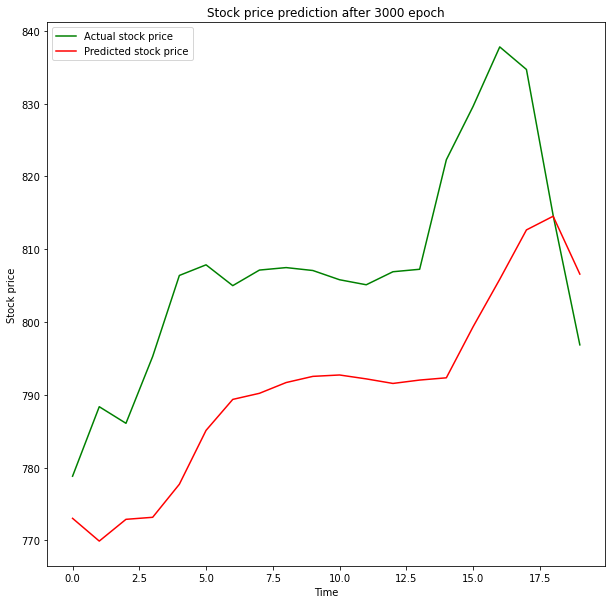

step: 3010, loss: 0.000192
step: 3020, loss: 0.001083
step: 3030, loss: 0.000477
step: 3040, loss: 0.000214
step: 3050, loss: 0.000717
step: 3060, loss: 0.000474
step: 3070, loss: 0.000843
step: 3080, loss: 0.000400
step: 3090, loss: 0.000275
step: 3100, loss: 0.000349
Plot after 3100 steps


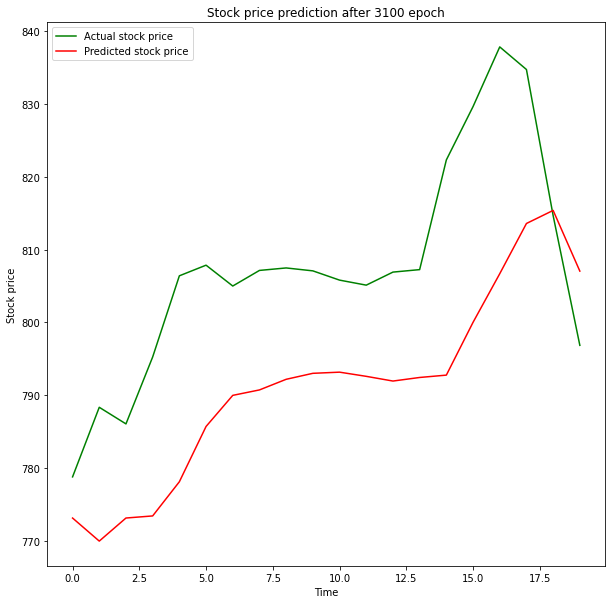

step: 3110, loss: 0.000146
step: 3120, loss: 0.000251
step: 3130, loss: 0.000297
step: 3140, loss: 0.000154
step: 3150, loss: 0.000267
step: 3160, loss: 0.000950
step: 3170, loss: 0.000380
step: 3180, loss: 0.000352
step: 3190, loss: 0.000310
step: 3200, loss: 0.000436
Plot after 3200 steps


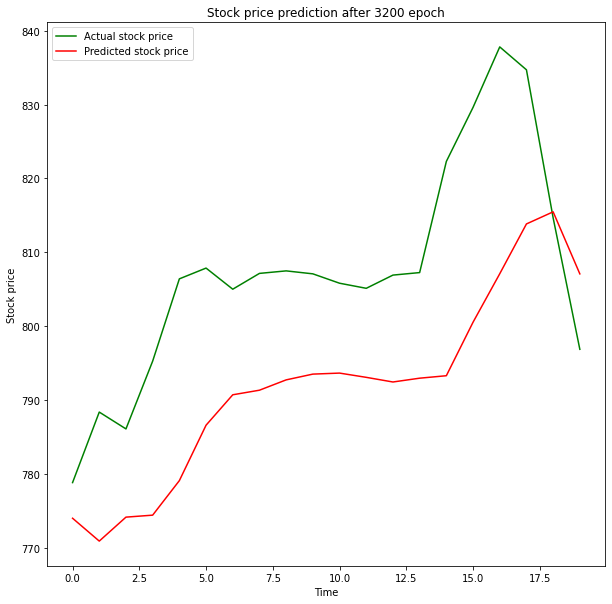

step: 3210, loss: 0.000094
step: 3220, loss: 0.000202
step: 3230, loss: 0.000468
step: 3240, loss: 0.000354
step: 3250, loss: 0.000491
step: 3260, loss: 0.000283
step: 3270, loss: 0.000085
step: 3280, loss: 0.000394
step: 3290, loss: 0.000697
step: 3300, loss: 0.000493
Plot after 3300 steps


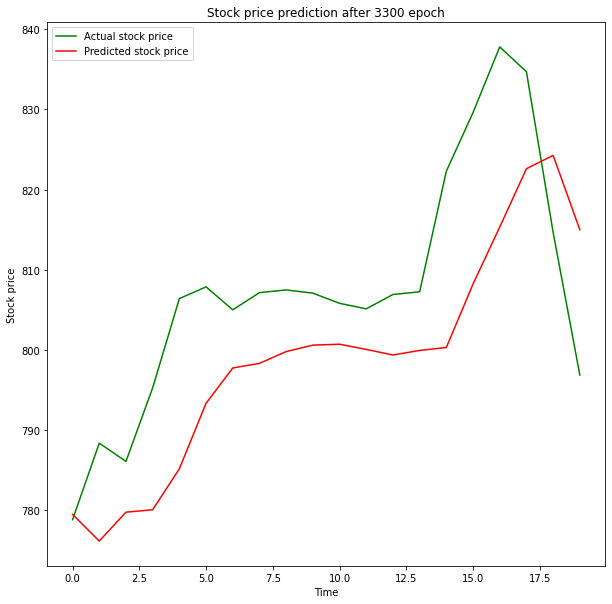

step: 3310, loss: 0.000442
step: 3320, loss: 0.000692
step: 3330, loss: 0.000273
step: 3340, loss: 0.000294
step: 3350, loss: 0.000286
step: 3360, loss: 0.000189
step: 3370, loss: 0.000138
step: 3380, loss: 0.000136
step: 3390, loss: 0.001212
step: 3400, loss: 0.000793
Plot after 3400 steps


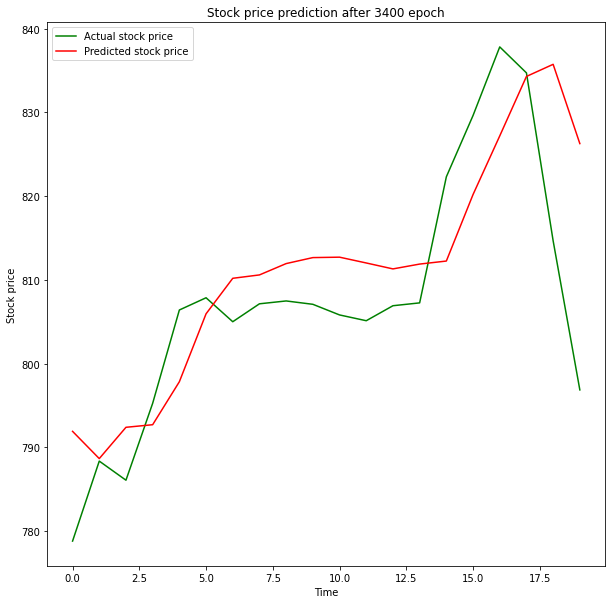

step: 3410, loss: 0.000555
step: 3420, loss: 0.000186
step: 3430, loss: 0.000221
step: 3440, loss: 0.000458
step: 3450, loss: 0.000242
step: 3460, loss: 0.000204
step: 3470, loss: 0.000213
step: 3480, loss: 0.000471
step: 3490, loss: 0.001514
step: 3500, loss: 0.000527
Plot after 3500 steps


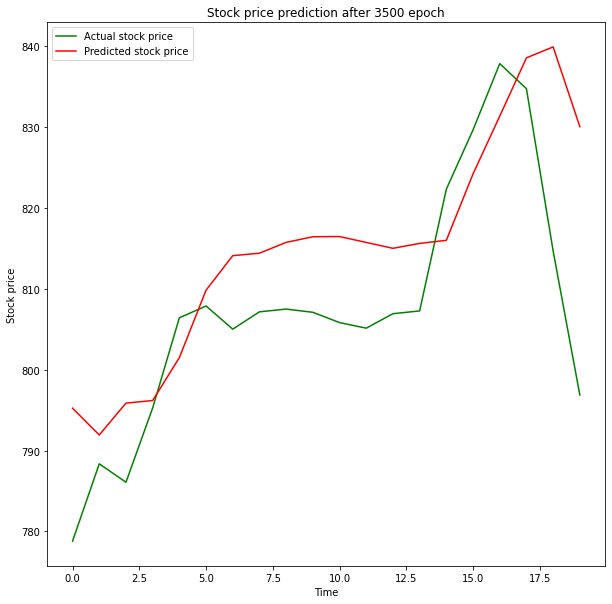

step: 3510, loss: 0.000655
step: 3520, loss: 0.000886
step: 3530, loss: 0.000347
step: 3540, loss: 0.000196
step: 3550, loss: 0.000162
step: 3560, loss: 0.000212
step: 3570, loss: 0.000123
step: 3580, loss: 0.000380
step: 3590, loss: 0.000114
step: 3600, loss: 0.000371
Plot after 3600 steps


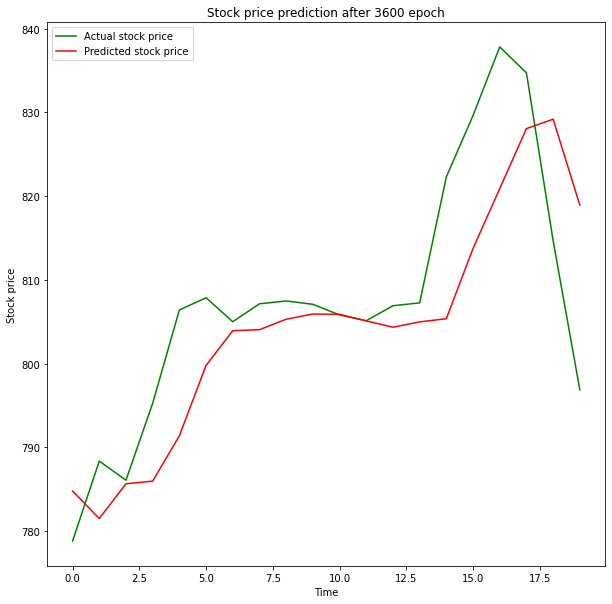

step: 3610, loss: 0.000662
step: 3620, loss: 0.000125
step: 3630, loss: 0.000171
step: 3640, loss: 0.000396
step: 3650, loss: 0.000926
step: 3660, loss: 0.000413
step: 3670, loss: 0.000457
step: 3680, loss: 0.000123
step: 3690, loss: 0.000350
step: 3700, loss: 0.000214
Plot after 3700 steps


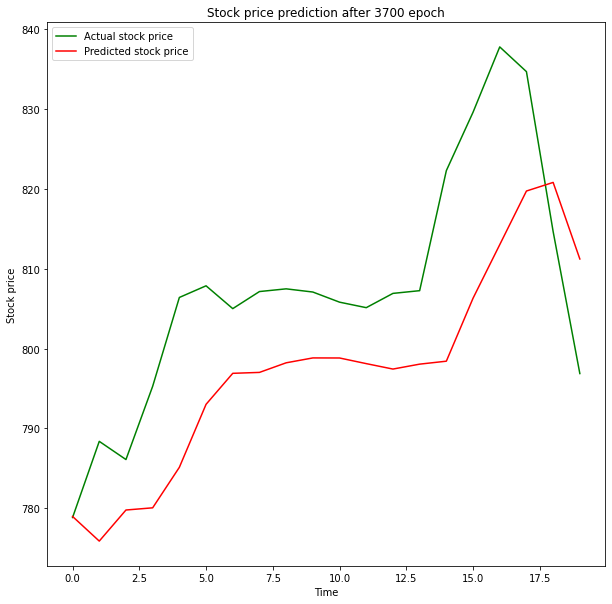

step: 3710, loss: 0.000151
step: 3720, loss: 0.000277
step: 3730, loss: 0.000229
step: 3740, loss: 0.000625
step: 3750, loss: 0.000209
step: 3760, loss: 0.000478
step: 3770, loss: 0.000127
step: 3780, loss: 0.000325
step: 3790, loss: 0.000439
step: 3800, loss: 0.000237
Plot after 3800 steps


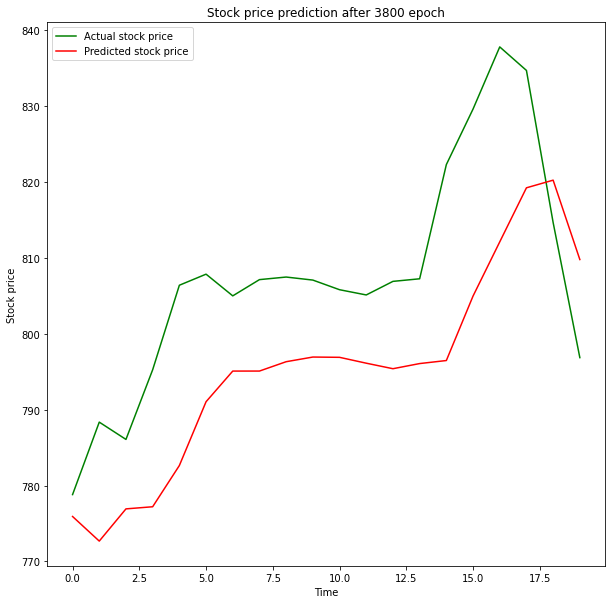

step: 3810, loss: 0.000199
step: 3820, loss: 0.000195
step: 3830, loss: 0.000127
step: 3840, loss: 0.000463
step: 3850, loss: 0.000251
step: 3860, loss: 0.000147
step: 3870, loss: 0.000248
step: 3880, loss: 0.001280
step: 3890, loss: 0.000590
step: 3900, loss: 0.000366
Plot after 3900 steps


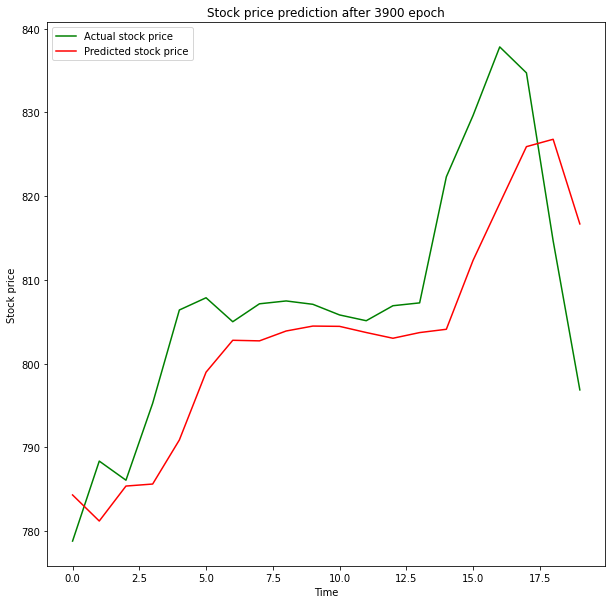

step: 3910, loss: 0.000109
step: 3920, loss: 0.001539
step: 3930, loss: 0.000471
step: 3940, loss: 0.000457
step: 3950, loss: 0.000217
step: 3960, loss: 0.000595
step: 3970, loss: 0.000562
step: 3980, loss: 0.000546
step: 3990, loss: 0.000533
step: 4000, loss: 0.000169
Plot after 4000 steps


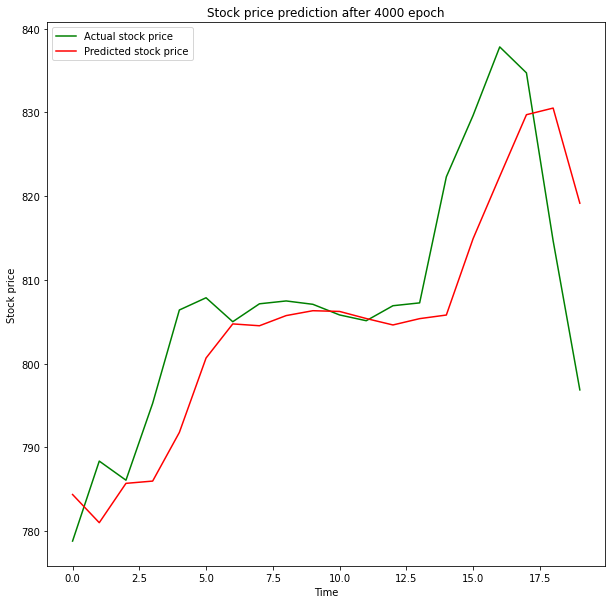

step: 4010, loss: 0.000246
step: 4020, loss: 0.000277
step: 4030, loss: 0.000667
step: 4040, loss: 0.000095
step: 4050, loss: 0.000114
step: 4060, loss: 0.000288
step: 4070, loss: 0.000571
step: 4080, loss: 0.000089
step: 4090, loss: 0.000116
step: 4100, loss: 0.000319
Plot after 4100 steps


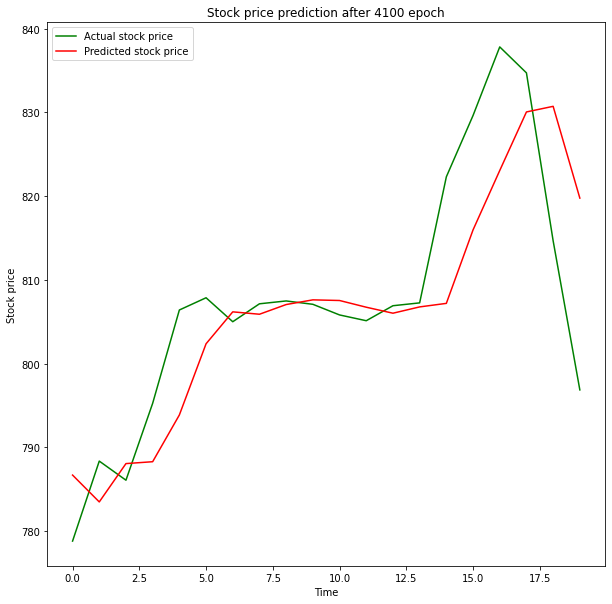

step: 4110, loss: 0.000270
step: 4120, loss: 0.000459
step: 4130, loss: 0.001457
step: 4140, loss: 0.000277
step: 4150, loss: 0.000471
step: 4160, loss: 0.000475
step: 4170, loss: 0.000192
step: 4180, loss: 0.000425
step: 4190, loss: 0.000195
step: 4200, loss: 0.000122
Plot after 4200 steps


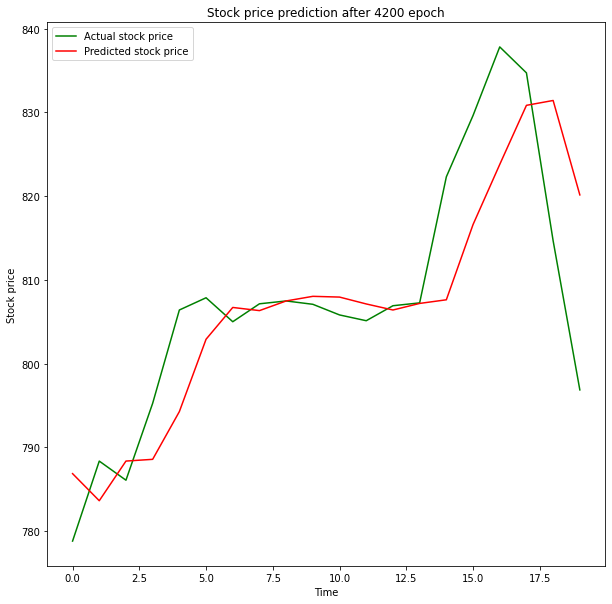

step: 4210, loss: 0.000672
step: 4220, loss: 0.000352
step: 4230, loss: 0.000184
step: 4240, loss: 0.000701
step: 4250, loss: 0.000676
step: 4260, loss: 0.000098
step: 4270, loss: 0.000320
step: 4280, loss: 0.000283
step: 4290, loss: 0.000894
step: 4300, loss: 0.000251
Plot after 4300 steps


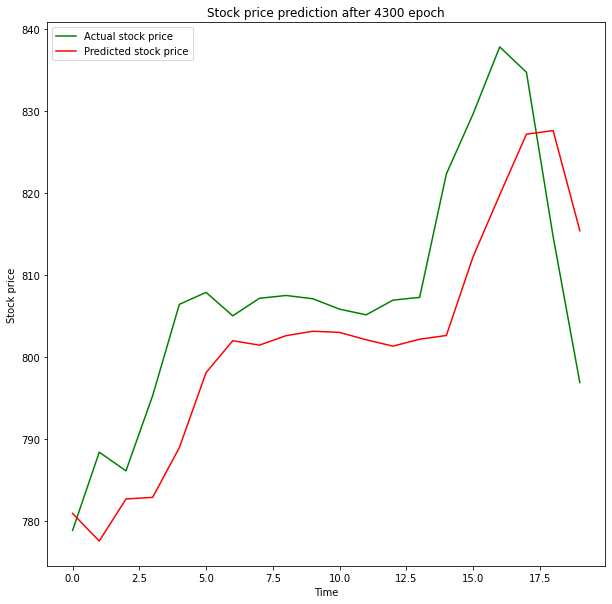

step: 4310, loss: 0.000208
step: 4320, loss: 0.000319
step: 4330, loss: 0.000394
step: 4340, loss: 0.000288
step: 4350, loss: 0.000685
step: 4360, loss: 0.000517
step: 4370, loss: 0.000108
step: 4380, loss: 0.000456
step: 4390, loss: 0.000531
step: 4400, loss: 0.000405
Plot after 4400 steps


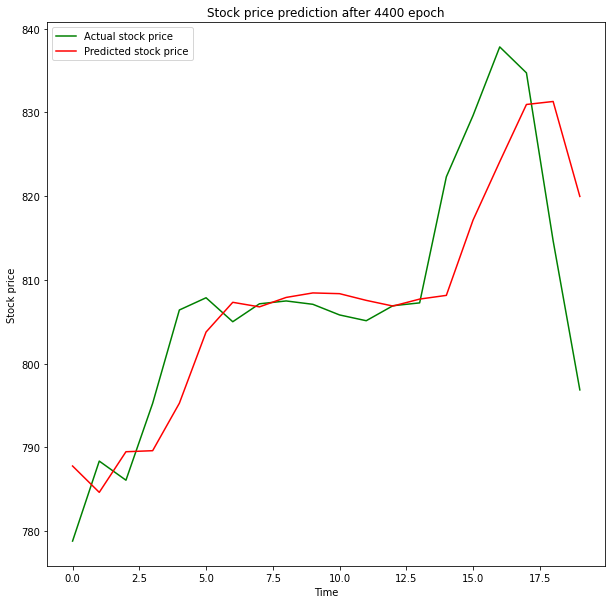

step: 4410, loss: 0.000141
step: 4420, loss: 0.000282
step: 4430, loss: 0.001700
step: 4440, loss: 0.000226
step: 4450, loss: 0.000254
step: 4460, loss: 0.000078
step: 4470, loss: 0.000293
step: 4480, loss: 0.001363
step: 4490, loss: 0.000177
step: 4500, loss: 0.000274
Plot after 4500 steps


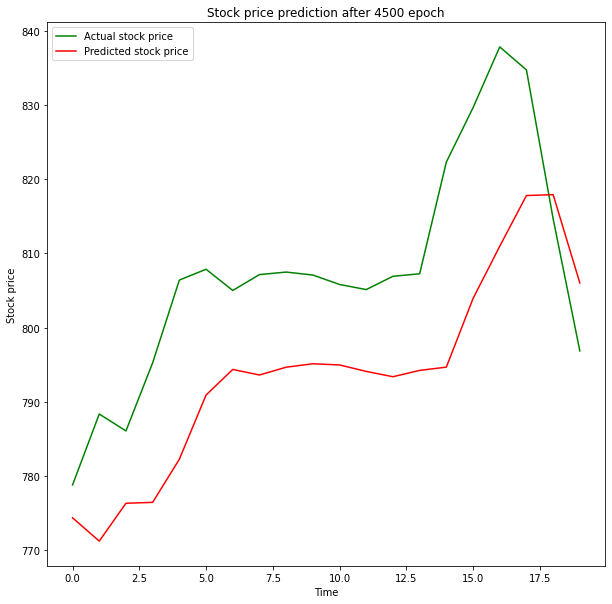

step: 4510, loss: 0.000105
step: 4520, loss: 0.000229
step: 4530, loss: 0.000792
step: 4540, loss: 0.000466
step: 4550, loss: 0.000116
step: 4560, loss: 0.000401
step: 4570, loss: 0.000187
step: 4580, loss: 0.000246
step: 4590, loss: 0.000113
step: 4600, loss: 0.000189
Plot after 4600 steps


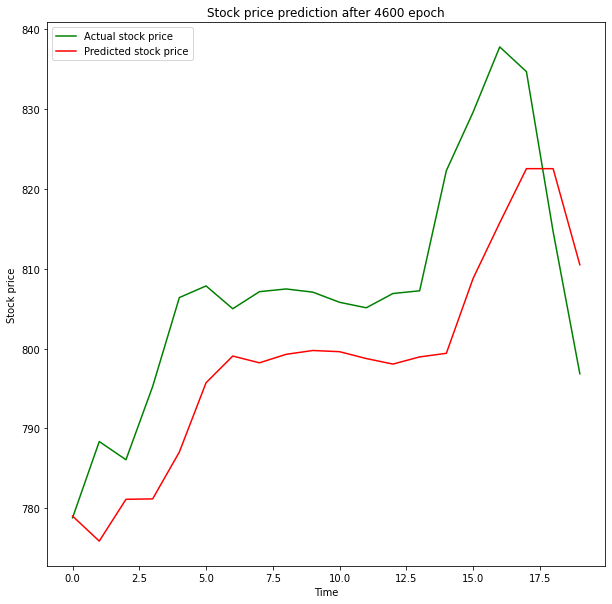

step: 4610, loss: 0.000333
step: 4620, loss: 0.000176
step: 4630, loss: 0.000493
step: 4640, loss: 0.000466
step: 4650, loss: 0.001043
step: 4660, loss: 0.000432
step: 4670, loss: 0.000340
step: 4680, loss: 0.000710
step: 4690, loss: 0.000417
step: 4700, loss: 0.000248
Plot after 4700 steps


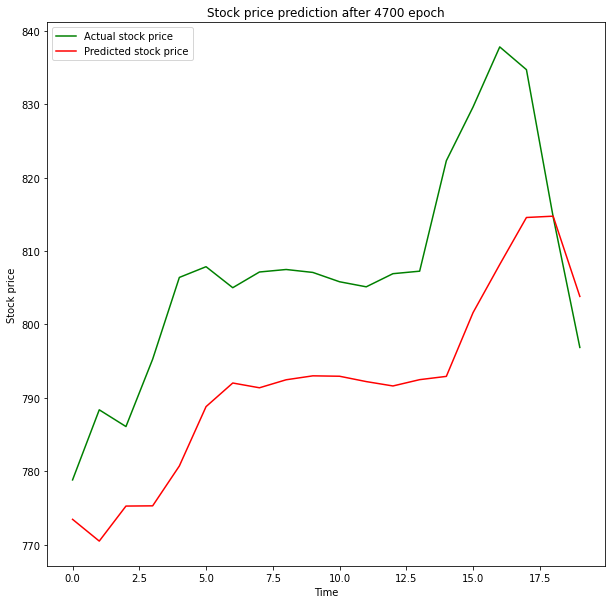

step: 4710, loss: 0.000409
step: 4720, loss: 0.000441
step: 4730, loss: 0.000132
step: 4740, loss: 0.000195
step: 4750, loss: 0.000284
step: 4760, loss: 0.000316
step: 4770, loss: 0.000365
step: 4780, loss: 0.000395
step: 4790, loss: 0.000345
step: 4800, loss: 0.000349
Plot after 4800 steps


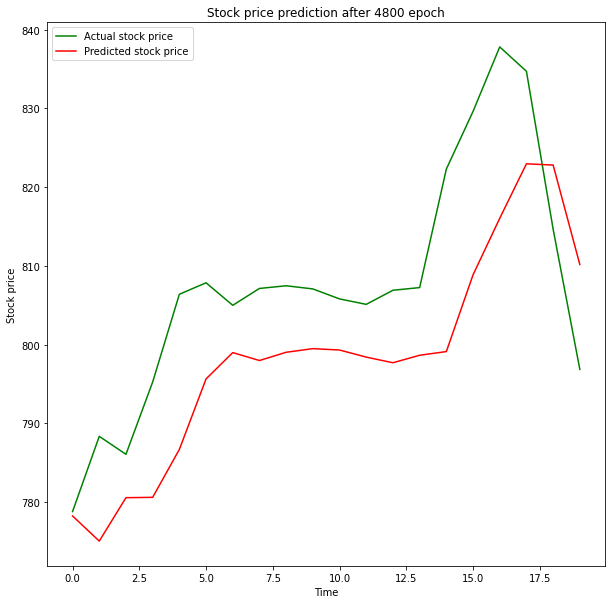

step: 4810, loss: 0.000420
step: 4820, loss: 0.000181
step: 4830, loss: 0.000413
step: 4840, loss: 0.000211
step: 4850, loss: 0.000218
step: 4860, loss: 0.000107
step: 4870, loss: 0.000260
step: 4880, loss: 0.000157
step: 4890, loss: 0.000141
step: 4900, loss: 0.000112
Plot after 4900 steps


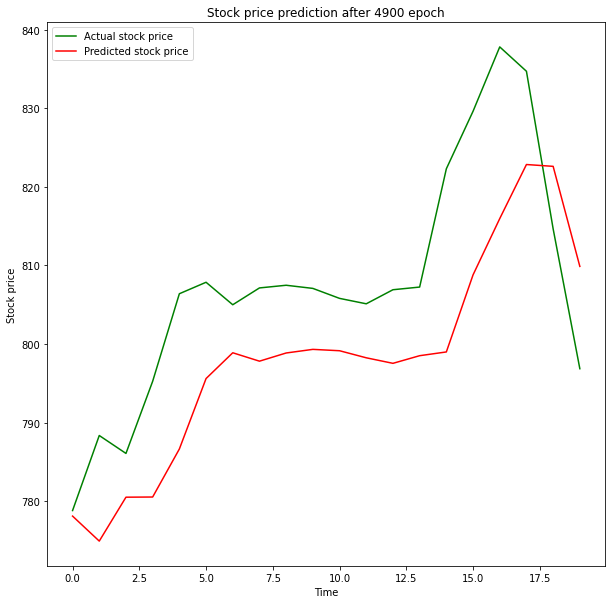

step: 4910, loss: 0.000104
step: 4920, loss: 0.000214
step: 4930, loss: 0.000169
step: 4940, loss: 0.001767
step: 4950, loss: 0.000235
step: 4960, loss: 0.000185
step: 4970, loss: 0.000576
step: 4980, loss: 0.000249
step: 4990, loss: 0.000178
step: 5000, loss: 0.000308
Plot after 5000 steps


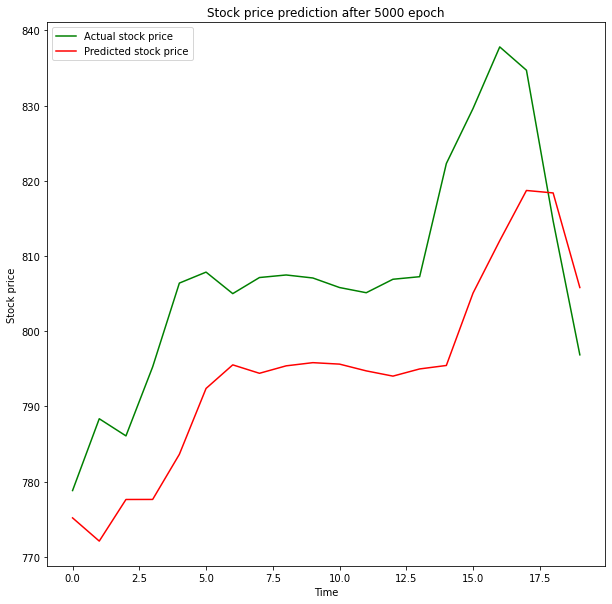

step: 5010, loss: 0.000170
step: 5020, loss: 0.000612
step: 5030, loss: 0.000281
step: 5040, loss: 0.000527
step: 5050, loss: 0.000513
step: 5060, loss: 0.000258
step: 5070, loss: 0.000313
step: 5080, loss: 0.000237
step: 5090, loss: 0.000235
step: 5100, loss: 0.001074
Plot after 5100 steps


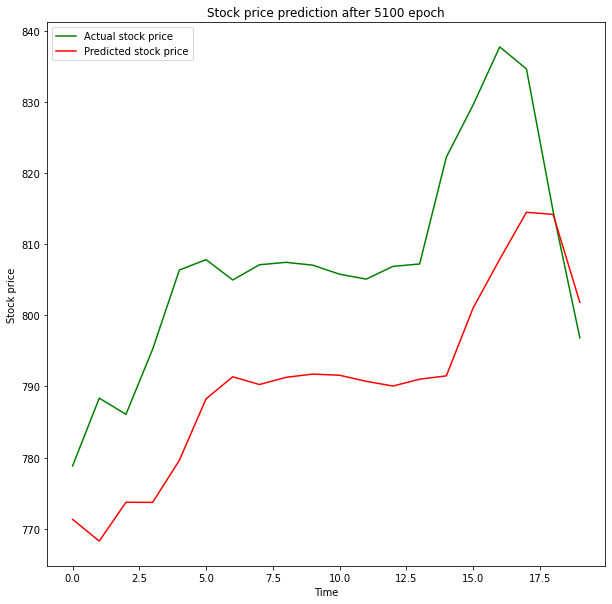

step: 5110, loss: 0.000446
step: 5120, loss: 0.000096
step: 5130, loss: 0.000144
step: 5140, loss: 0.000220
step: 5150, loss: 0.000278
step: 5160, loss: 0.000440
step: 5170, loss: 0.001348
step: 5180, loss: 0.000516
step: 5190, loss: 0.000171
step: 5200, loss: 0.000109
Plot after 5200 steps


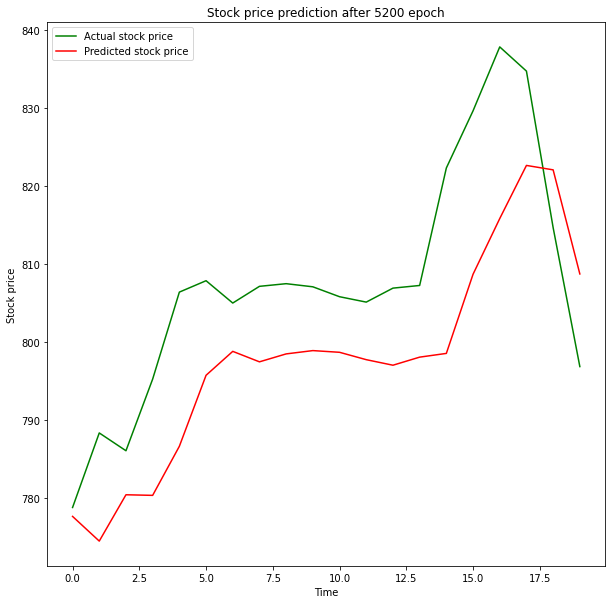

step: 5210, loss: 0.000227
step: 5220, loss: 0.000216
step: 5230, loss: 0.000412
step: 5240, loss: 0.000160
step: 5250, loss: 0.000136
step: 5260, loss: 0.000179
step: 5270, loss: 0.000293
step: 5280, loss: 0.000621
step: 5290, loss: 0.000133
step: 5300, loss: 0.000212
Plot after 5300 steps


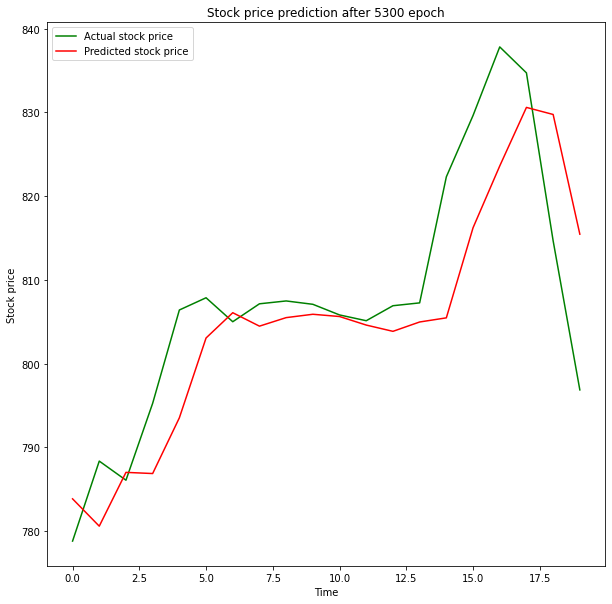

step: 5310, loss: 0.000174
step: 5320, loss: 0.000146
step: 5330, loss: 0.000218
step: 5340, loss: 0.000182
step: 5350, loss: 0.000364
step: 5360, loss: 0.000171
step: 5370, loss: 0.000159
step: 5380, loss: 0.000110
step: 5390, loss: 0.000173
step: 5400, loss: 0.000204
Plot after 5400 steps


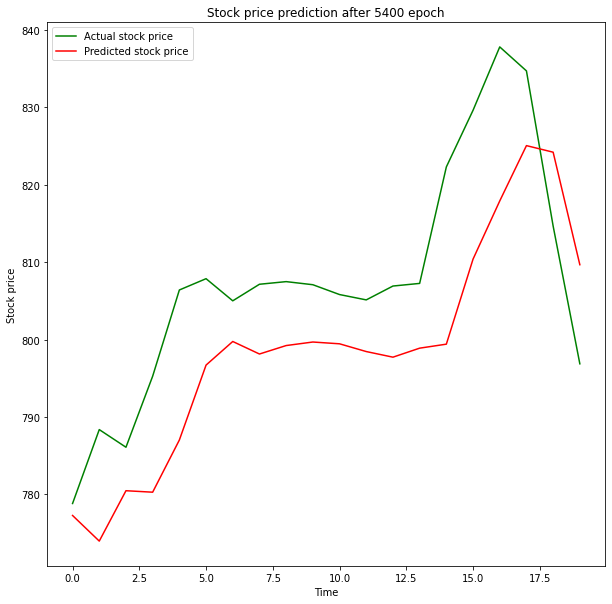

step: 5410, loss: 0.000504
step: 5420, loss: 0.001224
step: 5430, loss: 0.001021
step: 5440, loss: 0.000724
step: 5450, loss: 0.000327
step: 5460, loss: 0.000466
step: 5470, loss: 0.000285
step: 5480, loss: 0.000235
step: 5490, loss: 0.000130
step: 5500, loss: 0.000273
Plot after 5500 steps


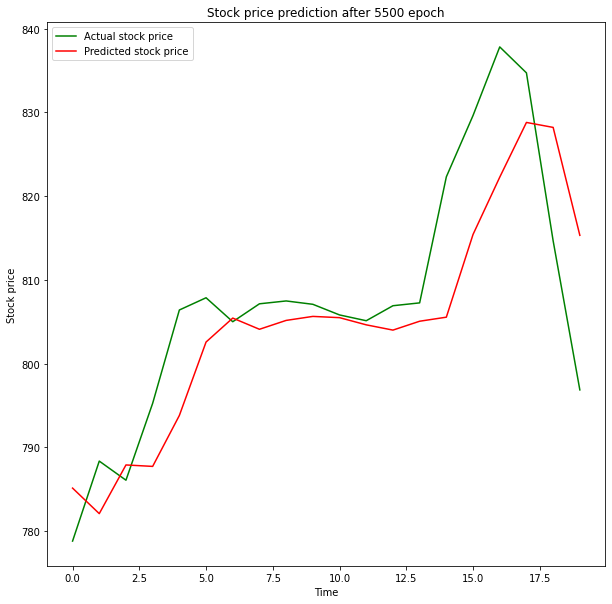

step: 5510, loss: 0.000237
step: 5520, loss: 0.000197
step: 5530, loss: 0.000417
step: 5540, loss: 0.000510
step: 5550, loss: 0.000076
step: 5560, loss: 0.000383
step: 5570, loss: 0.000195
step: 5580, loss: 0.000379
step: 5590, loss: 0.000169
step: 5600, loss: 0.000303
Plot after 5600 steps


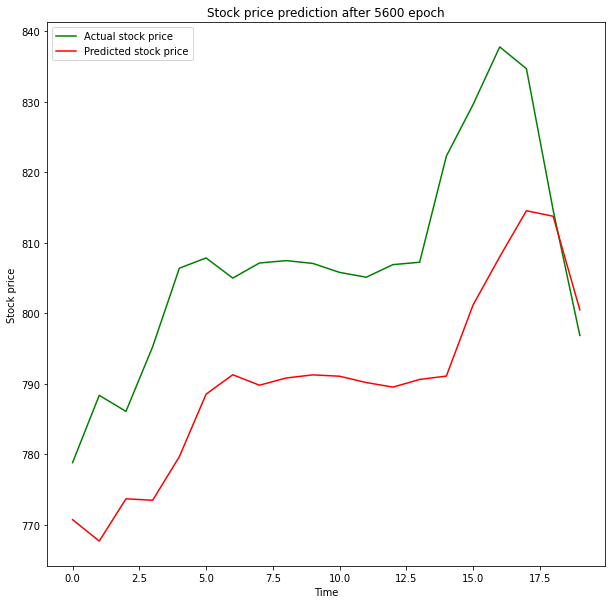

step: 5610, loss: 0.000513
step: 5620, loss: 0.000336
step: 5630, loss: 0.000147
step: 5640, loss: 0.000247
step: 5650, loss: 0.000150
step: 5660, loss: 0.000225
step: 5670, loss: 0.000488
step: 5680, loss: 0.000208
step: 5690, loss: 0.000431
step: 5700, loss: 0.000401
Plot after 5700 steps


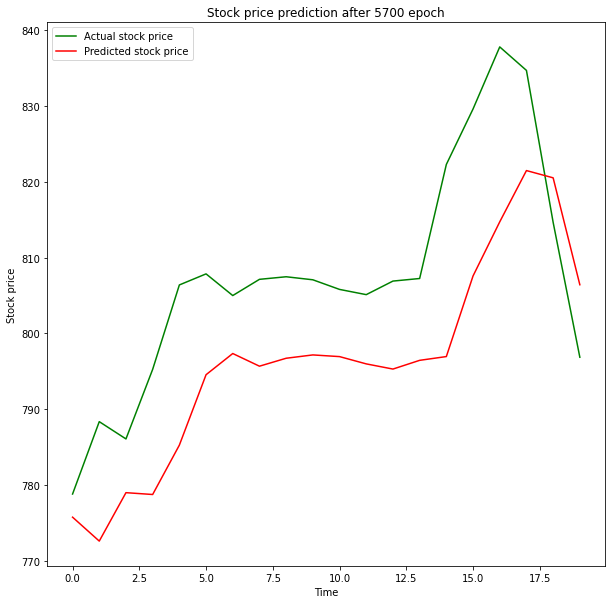

step: 5710, loss: 0.000260
step: 5720, loss: 0.000391
step: 5730, loss: 0.000145
step: 5740, loss: 0.000397
step: 5750, loss: 0.000223
step: 5760, loss: 0.000106
step: 5770, loss: 0.000339
step: 5780, loss: 0.000092
step: 5790, loss: 0.000209
step: 5800, loss: 0.000977
Plot after 5800 steps


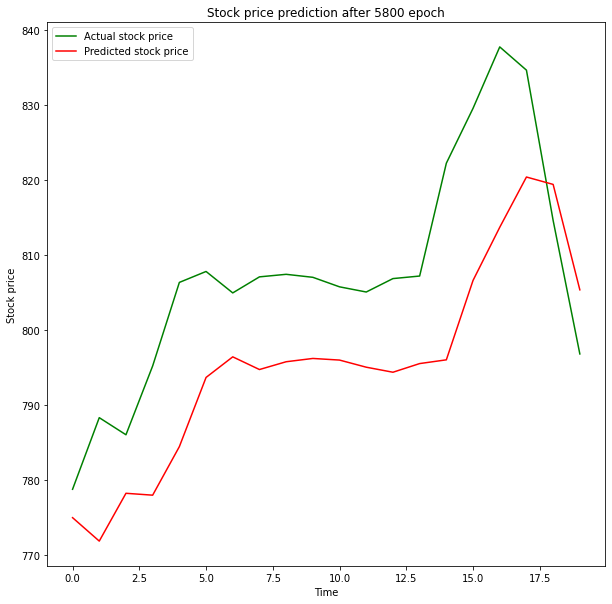

step: 5810, loss: 0.000151
step: 5820, loss: 0.000167
step: 5830, loss: 0.000414
step: 5840, loss: 0.000116
step: 5850, loss: 0.000315
step: 5860, loss: 0.000175
step: 5870, loss: 0.000343
step: 5880, loss: 0.000536
step: 5890, loss: 0.000062
step: 5900, loss: 0.000481
Plot after 5900 steps


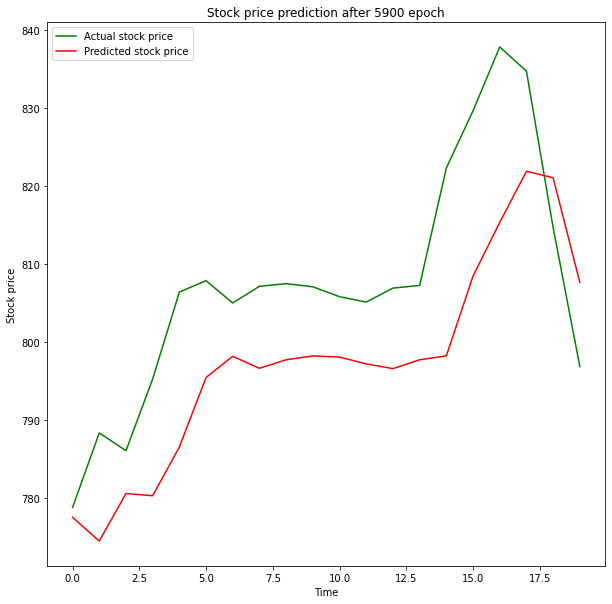

step: 5910, loss: 0.000182
step: 5920, loss: 0.000122
step: 5930, loss: 0.000351
step: 5940, loss: 0.000319
step: 5950, loss: 0.001392
step: 5960, loss: 0.000137
step: 5970, loss: 0.000147
step: 5980, loss: 0.000147
step: 5990, loss: 0.000146
step: 6000, loss: 0.000531
Plot after 6000 steps


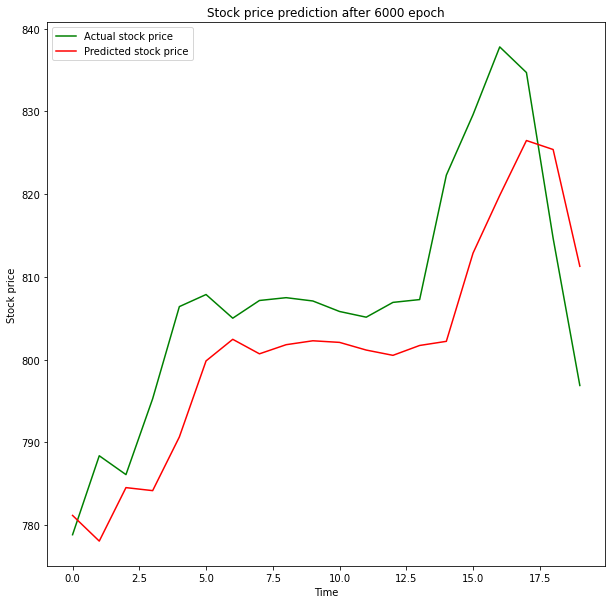

step: 6010, loss: 0.000147
step: 6020, loss: 0.000379
step: 6030, loss: 0.000306
step: 6040, loss: 0.000134
step: 6050, loss: 0.000264
step: 6060, loss: 0.000595
step: 6070, loss: 0.000097
step: 6080, loss: 0.000588
step: 6090, loss: 0.000332
step: 6100, loss: 0.000335
Plot after 6100 steps


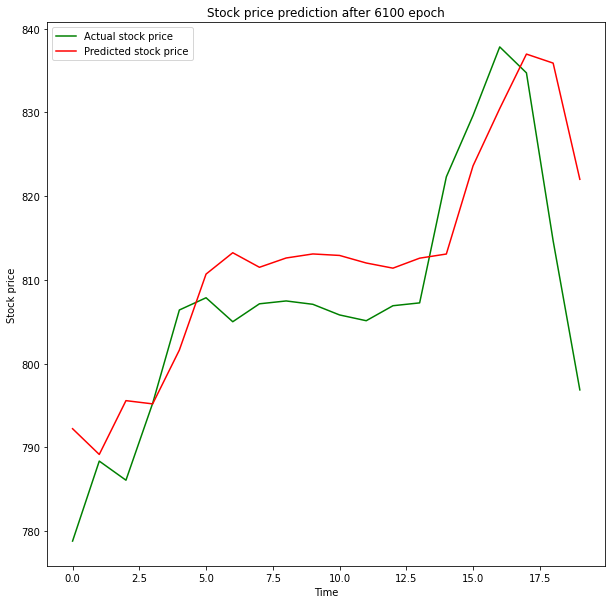

step: 6110, loss: 0.000120
step: 6120, loss: 0.000242
step: 6130, loss: 0.000140
step: 6140, loss: 0.000171
step: 6150, loss: 0.000138
step: 6160, loss: 0.000827
step: 6170, loss: 0.000659
step: 6180, loss: 0.001076
step: 6190, loss: 0.000351
step: 6200, loss: 0.000255
Plot after 6200 steps


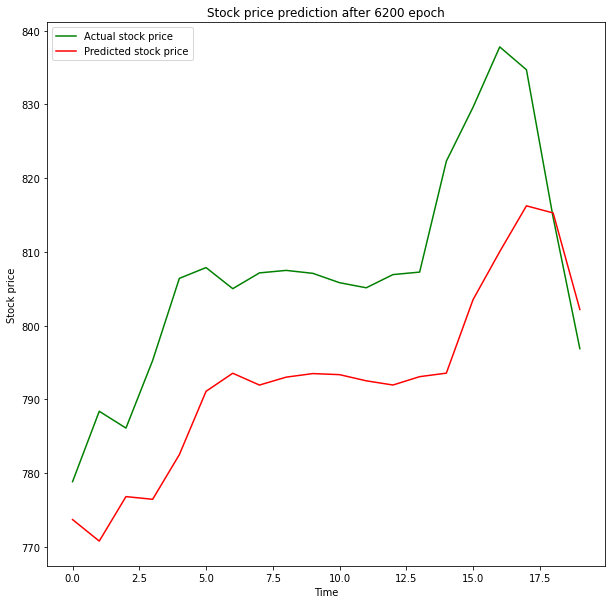

step: 6210, loss: 0.000306
step: 6220, loss: 0.000110
step: 6230, loss: 0.000499
step: 6240, loss: 0.000142
step: 6250, loss: 0.000576
step: 6260, loss: 0.000072
step: 6270, loss: 0.001034
step: 6280, loss: 0.000430
step: 6290, loss: 0.000256
step: 6300, loss: 0.000646
Plot after 6300 steps


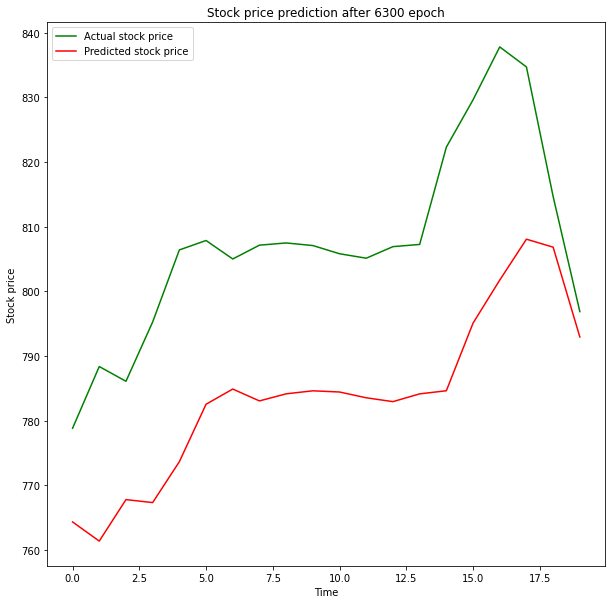

step: 6310, loss: 0.000583
step: 6320, loss: 0.000212
step: 6330, loss: 0.000110
step: 6340, loss: 0.000725
step: 6350, loss: 0.000255
step: 6360, loss: 0.000162
step: 6370, loss: 0.000287
step: 6380, loss: 0.000300
step: 6390, loss: 0.000405
step: 6400, loss: 0.000100
Plot after 6400 steps


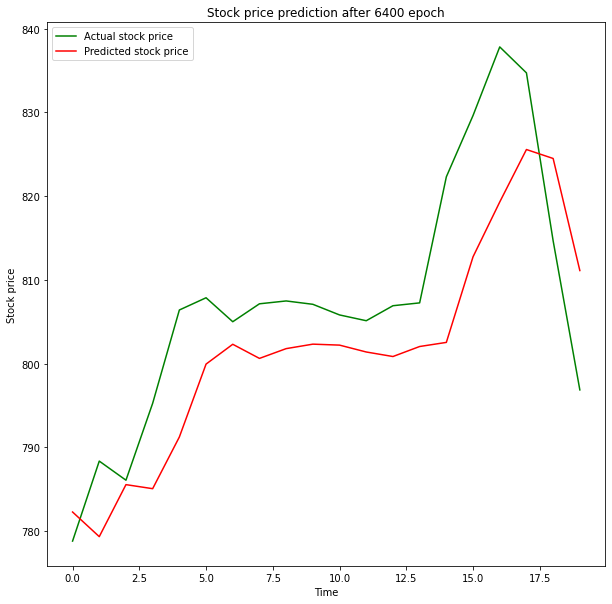

step: 6410, loss: 0.001190
step: 6420, loss: 0.000366
step: 6430, loss: 0.000109
step: 6440, loss: 0.000312
step: 6450, loss: 0.000223
step: 6460, loss: 0.001377
step: 6470, loss: 0.000513
step: 6480, loss: 0.000432
step: 6490, loss: 0.000158
step: 6500, loss: 0.000323
Plot after 6500 steps


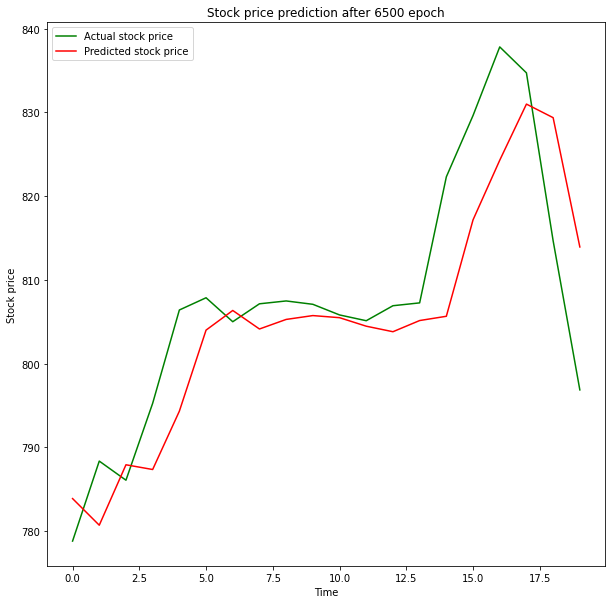

step: 6510, loss: 0.000169
step: 6520, loss: 0.000385
step: 6530, loss: 0.000785
step: 6540, loss: 0.000486
step: 6550, loss: 0.000179
step: 6560, loss: 0.000157
step: 6570, loss: 0.000273
step: 6580, loss: 0.000179
step: 6590, loss: 0.000170
step: 6600, loss: 0.000111
Plot after 6600 steps


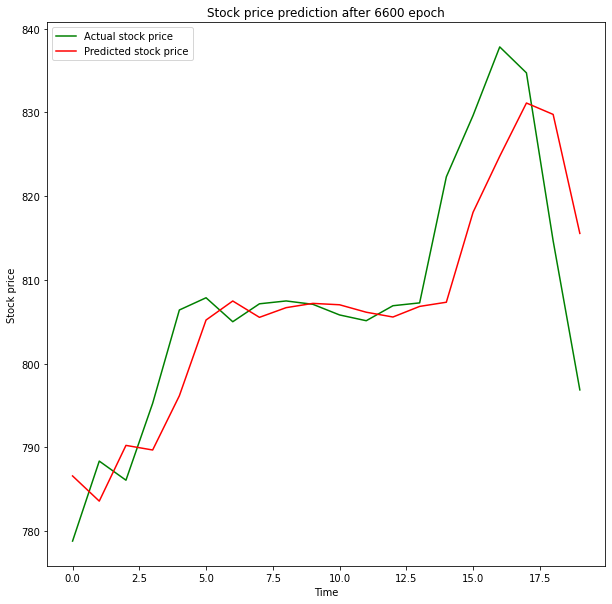

step: 6610, loss: 0.000234
step: 6620, loss: 0.000182
step: 6630, loss: 0.000127
step: 6640, loss: 0.000222
step: 6650, loss: 0.000340
step: 6660, loss: 0.000694
step: 6670, loss: 0.000104
step: 6680, loss: 0.000172
step: 6690, loss: 0.000168
step: 6700, loss: 0.000452
Plot after 6700 steps


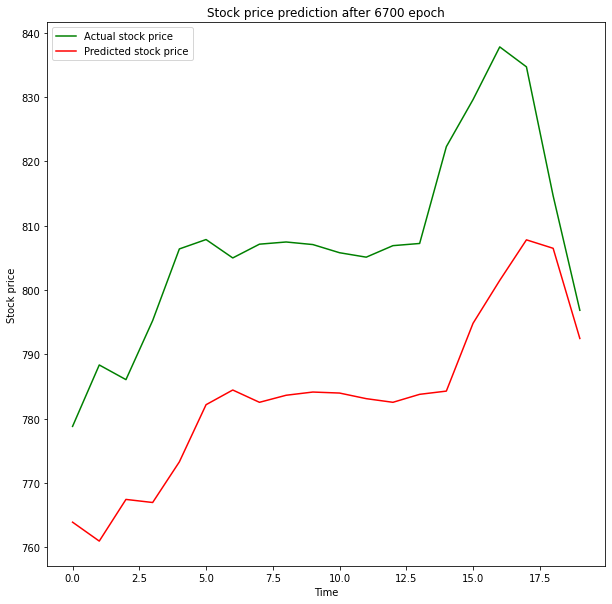

step: 6710, loss: 0.000289
step: 6720, loss: 0.000310
step: 6730, loss: 0.000222
step: 6740, loss: 0.000159
step: 6750, loss: 0.000152
step: 6760, loss: 0.000199
step: 6770, loss: 0.000140
step: 6780, loss: 0.000239
step: 6790, loss: 0.000306
step: 6800, loss: 0.000264
Plot after 6800 steps


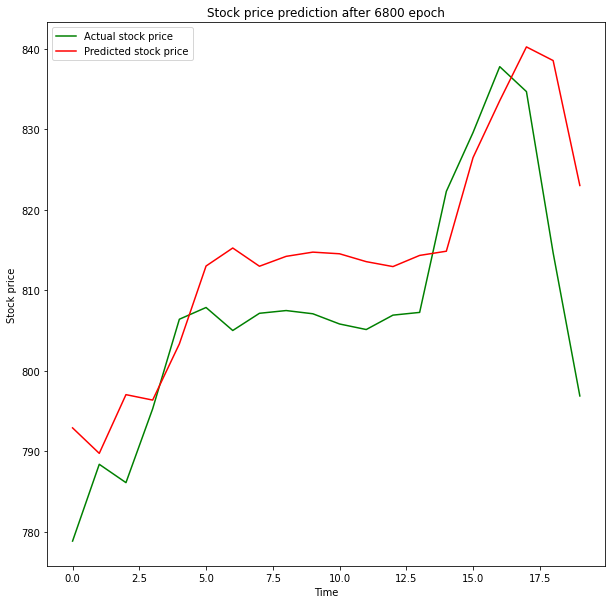

step: 6810, loss: 0.000569
step: 6820, loss: 0.000807
step: 6830, loss: 0.000133
step: 6840, loss: 0.000111
step: 6850, loss: 0.000799
step: 6860, loss: 0.000449
step: 6870, loss: 0.000233
step: 6880, loss: 0.000132
step: 6890, loss: 0.000187
step: 6900, loss: 0.000154
Plot after 6900 steps


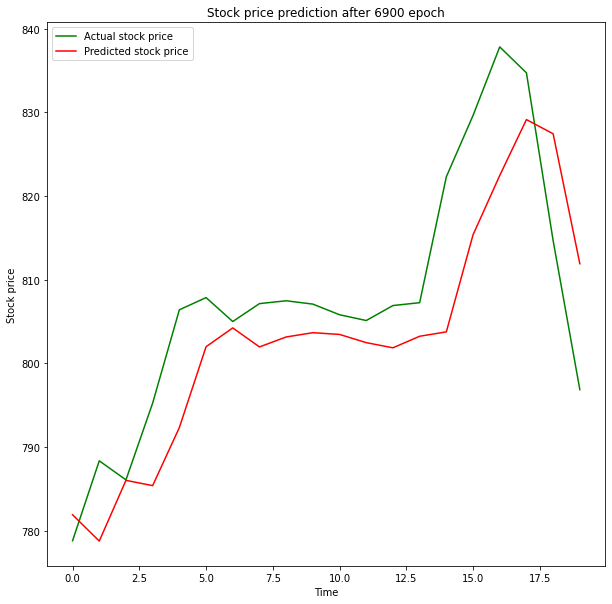

step: 6910, loss: 0.000216
step: 6920, loss: 0.000187
step: 6930, loss: 0.000117
step: 6940, loss: 0.000222
step: 6950, loss: 0.000226
step: 6960, loss: 0.000208
step: 6970, loss: 0.000141
step: 6980, loss: 0.000507
step: 6990, loss: 0.000228
step: 7000, loss: 0.000310
Plot after 7000 steps


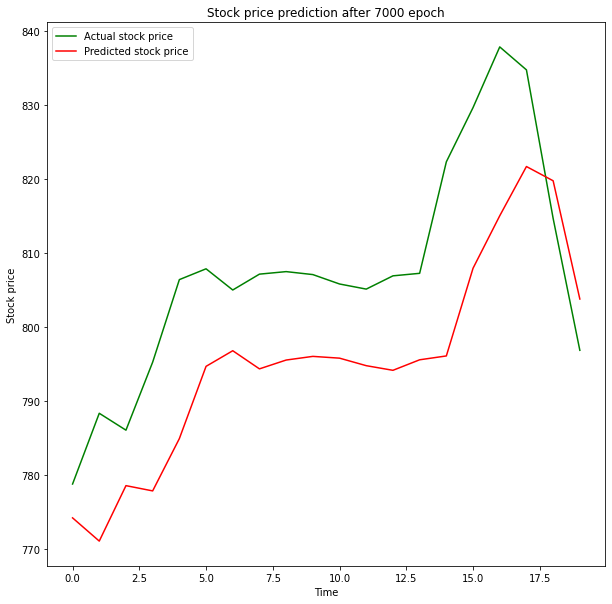

step: 7010, loss: 0.000430
step: 7020, loss: 0.000042
step: 7030, loss: 0.000106
step: 7040, loss: 0.000398
step: 7050, loss: 0.000187
step: 7060, loss: 0.000397
step: 7070, loss: 0.000178
step: 7080, loss: 0.000240
step: 7090, loss: 0.000085
step: 7100, loss: 0.000172
Plot after 7100 steps


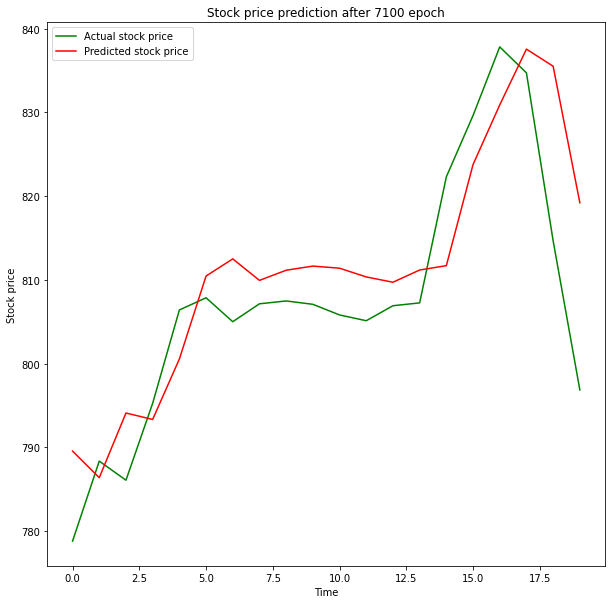

step: 7110, loss: 0.000331
step: 7120, loss: 0.000322
step: 7130, loss: 0.000244
step: 7140, loss: 0.000287
step: 7150, loss: 0.000431
step: 7160, loss: 0.000306
step: 7170, loss: 0.000229
step: 7180, loss: 0.000092
step: 7190, loss: 0.000142
step: 7200, loss: 0.001363
Plot after 7200 steps


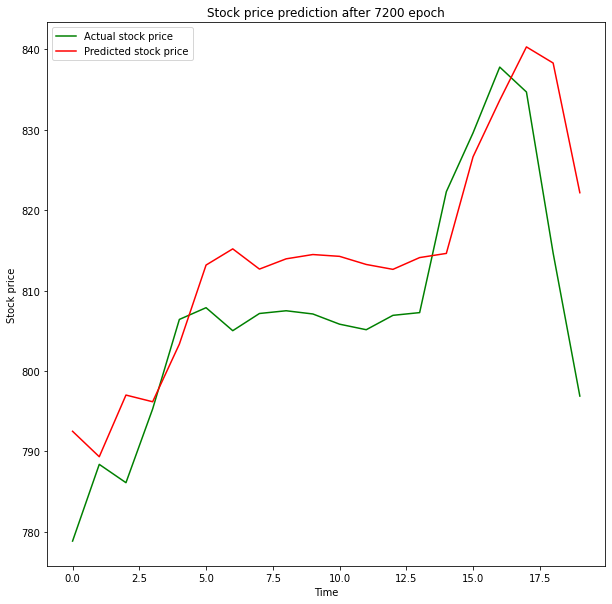

step: 7210, loss: 0.000368
step: 7220, loss: 0.000590
step: 7230, loss: 0.000357
step: 7240, loss: 0.000103
step: 7250, loss: 0.000671
step: 7260, loss: 0.000245
step: 7270, loss: 0.000150
step: 7280, loss: 0.000803
step: 7290, loss: 0.000431
step: 7300, loss: 0.000188
Plot after 7300 steps


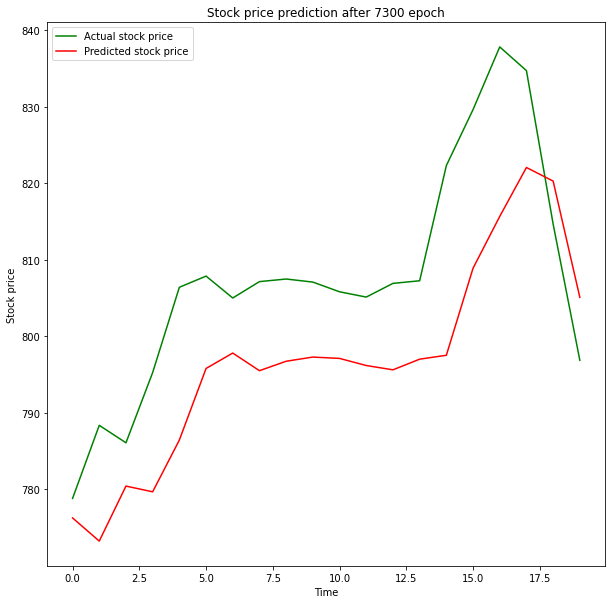

step: 7310, loss: 0.000115
step: 7320, loss: 0.000278
step: 7330, loss: 0.000166
step: 7340, loss: 0.000186
step: 7350, loss: 0.000238
step: 7360, loss: 0.000150
step: 7370, loss: 0.000288
step: 7380, loss: 0.000972
step: 7390, loss: 0.000177
step: 7400, loss: 0.000853
Plot after 7400 steps


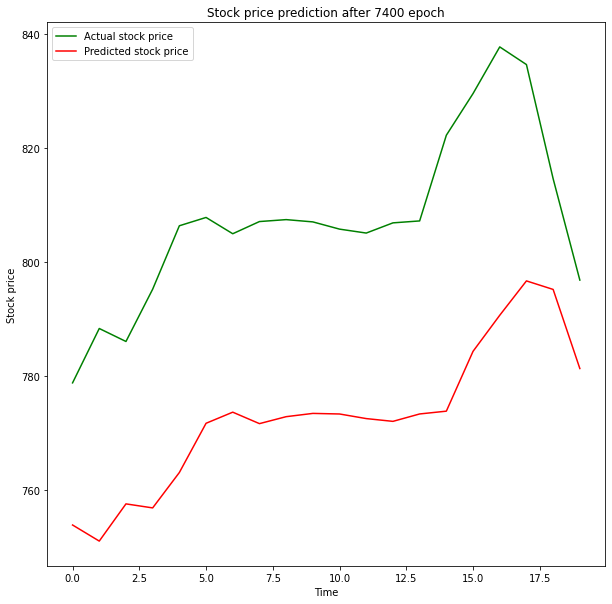

step: 7410, loss: 0.001291
step: 7420, loss: 0.001103
step: 7430, loss: 0.000206
step: 7440, loss: 0.000257
step: 7450, loss: 0.000295
step: 7460, loss: 0.000283
step: 7470, loss: 0.000303
step: 7480, loss: 0.001003
step: 7490, loss: 0.000404
step: 7500, loss: 0.000276
Plot after 7500 steps


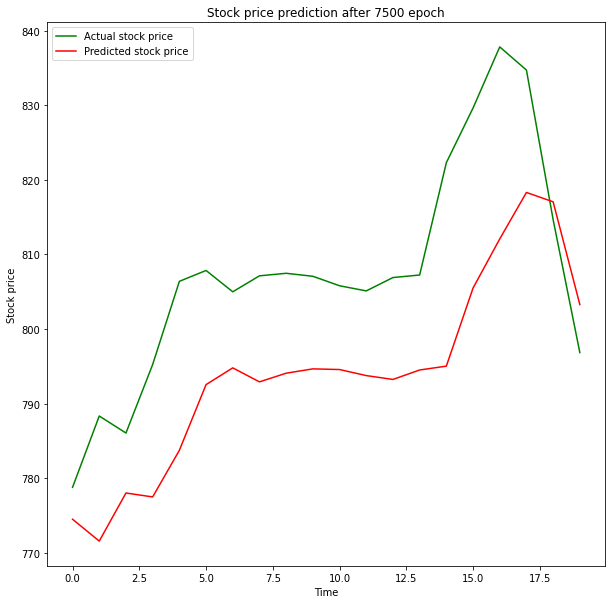

step: 7510, loss: 0.000162
step: 7520, loss: 0.000607
step: 7530, loss: 0.000392
step: 7540, loss: 0.000212
step: 7550, loss: 0.000410
step: 7560, loss: 0.000442
step: 7570, loss: 0.000410
step: 7580, loss: 0.000460
step: 7590, loss: 0.000151
step: 7600, loss: 0.000153
Plot after 7600 steps


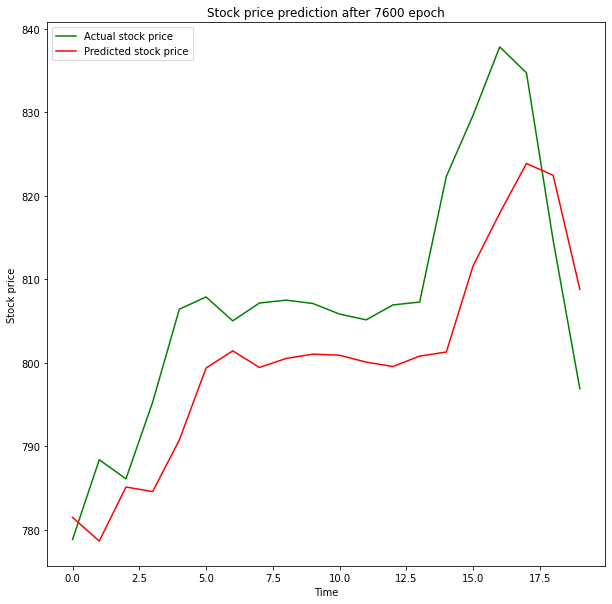

step: 7610, loss: 0.001118
step: 7620, loss: 0.000560
step: 7630, loss: 0.000554
step: 7640, loss: 0.000506
step: 7650, loss: 0.000220
step: 7660, loss: 0.000334
step: 7670, loss: 0.000226
step: 7680, loss: 0.000137
step: 7690, loss: 0.000278
step: 7700, loss: 0.000521
Plot after 7700 steps


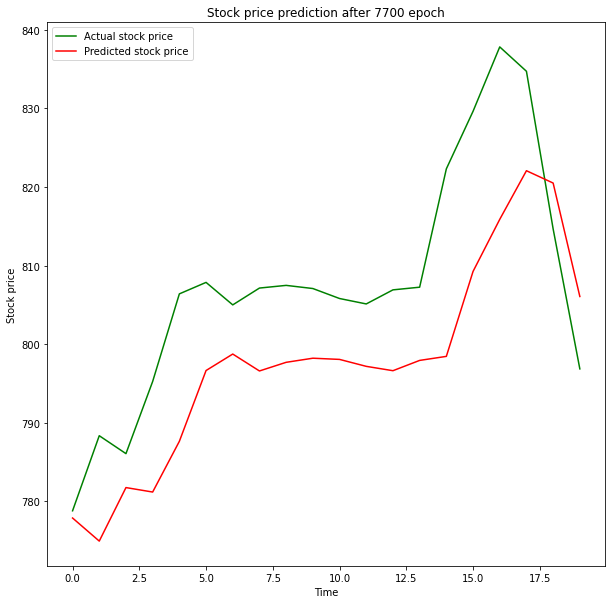

step: 7710, loss: 0.000602
step: 7720, loss: 0.000349
step: 7730, loss: 0.000326
step: 7740, loss: 0.000379
step: 7750, loss: 0.000678
step: 7760, loss: 0.000145
step: 7770, loss: 0.000181
step: 7780, loss: 0.000479
step: 7790, loss: 0.000135
step: 7800, loss: 0.000395
Plot after 7800 steps


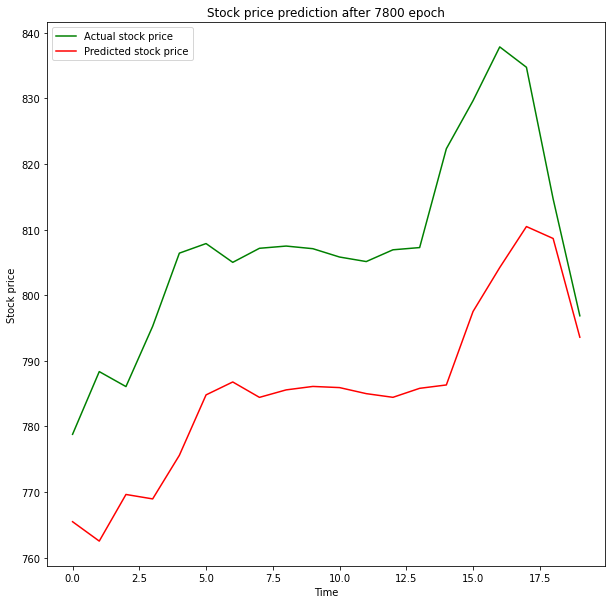

step: 7810, loss: 0.000402
step: 7820, loss: 0.000204
step: 7830, loss: 0.000546
step: 7840, loss: 0.000589
step: 7850, loss: 0.000589
step: 7860, loss: 0.001544
step: 7870, loss: 0.000205
step: 7880, loss: 0.000327
step: 7890, loss: 0.000260
step: 7900, loss: 0.000372
Plot after 7900 steps


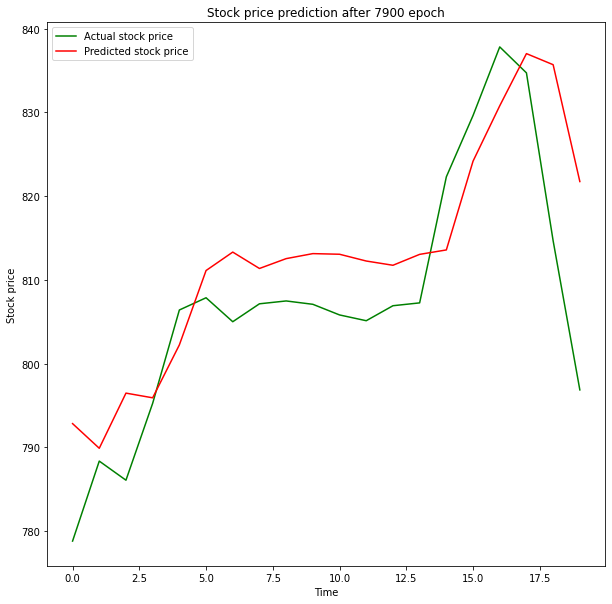

step: 7910, loss: 0.000115
step: 7920, loss: 0.000200
step: 7930, loss: 0.000206
step: 7940, loss: 0.000185
step: 7950, loss: 0.000138
step: 7960, loss: 0.000193
step: 7970, loss: 0.000256
step: 7980, loss: 0.002254
step: 7990, loss: 0.000076
step: 8000, loss: 0.000245
Plot after 8000 steps


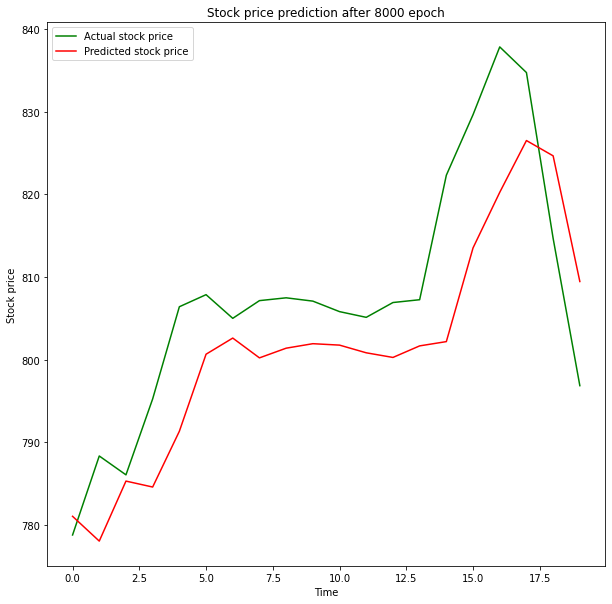

step: 8010, loss: 0.000278
step: 8020, loss: 0.000179
step: 8030, loss: 0.000197
step: 8040, loss: 0.000256
step: 8050, loss: 0.000126
step: 8060, loss: 0.000121
step: 8070, loss: 0.000235
step: 8080, loss: 0.000302
step: 8090, loss: 0.000450
step: 8100, loss: 0.000367
Plot after 8100 steps


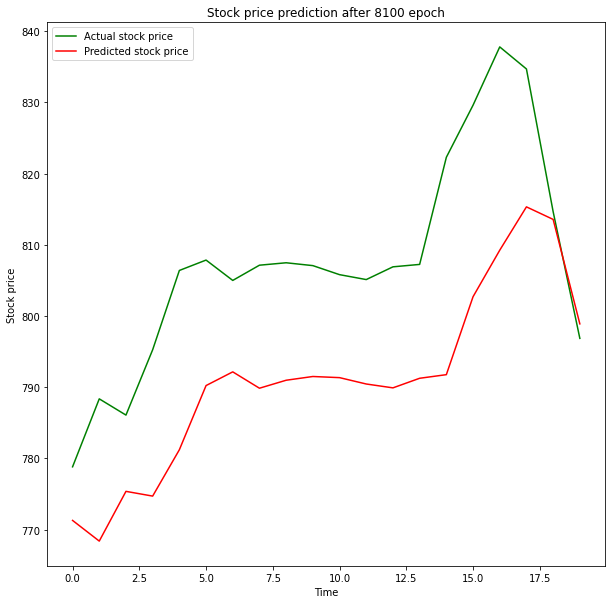

step: 8110, loss: 0.000160
step: 8120, loss: 0.000360
step: 8130, loss: 0.000191
step: 8140, loss: 0.000332
step: 8150, loss: 0.000276
step: 8160, loss: 0.000096
step: 8170, loss: 0.000155
step: 8180, loss: 0.001488
step: 8190, loss: 0.000395
step: 8200, loss: 0.000216
Plot after 8200 steps


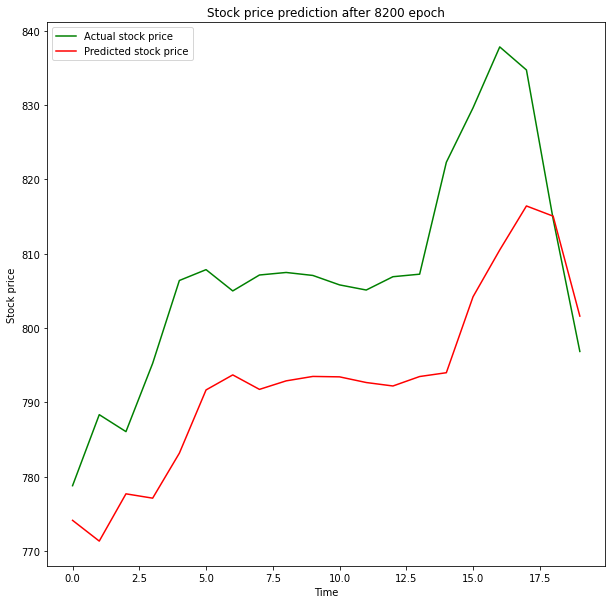

step: 8210, loss: 0.000182
step: 8220, loss: 0.000305
step: 8230, loss: 0.000154
step: 8240, loss: 0.000275
step: 8250, loss: 0.000225
step: 8260, loss: 0.000233
step: 8270, loss: 0.000275
step: 8280, loss: 0.000147
step: 8290, loss: 0.000385
step: 8300, loss: 0.000523
Plot after 8300 steps


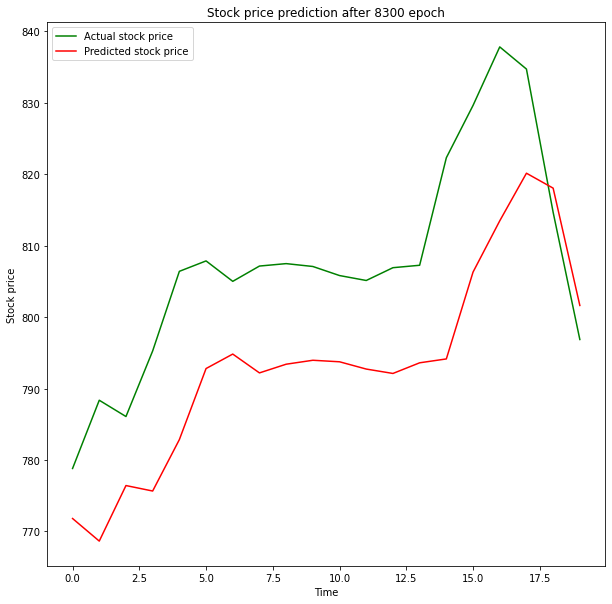

step: 8310, loss: 0.000239
step: 8320, loss: 0.000781
step: 8330, loss: 0.000315
step: 8340, loss: 0.000273
step: 8350, loss: 0.000401
step: 8360, loss: 0.000249
step: 8370, loss: 0.000173
step: 8380, loss: 0.000409
step: 8390, loss: 0.000287
step: 8400, loss: 0.000371
Plot after 8400 steps


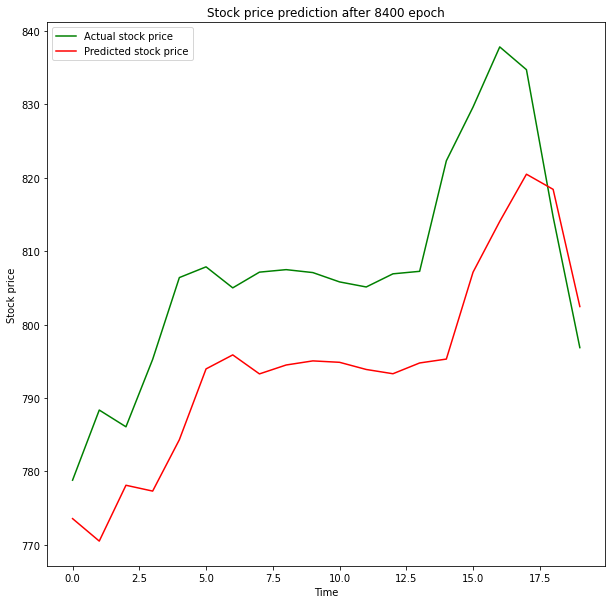

step: 8410, loss: 0.000160
step: 8420, loss: 0.000081
step: 8430, loss: 0.000221
step: 8440, loss: 0.000269
step: 8450, loss: 0.000389
step: 8460, loss: 0.000351
step: 8470, loss: 0.001253
step: 8480, loss: 0.000168
step: 8490, loss: 0.000144
step: 8500, loss: 0.000710
Plot after 8500 steps


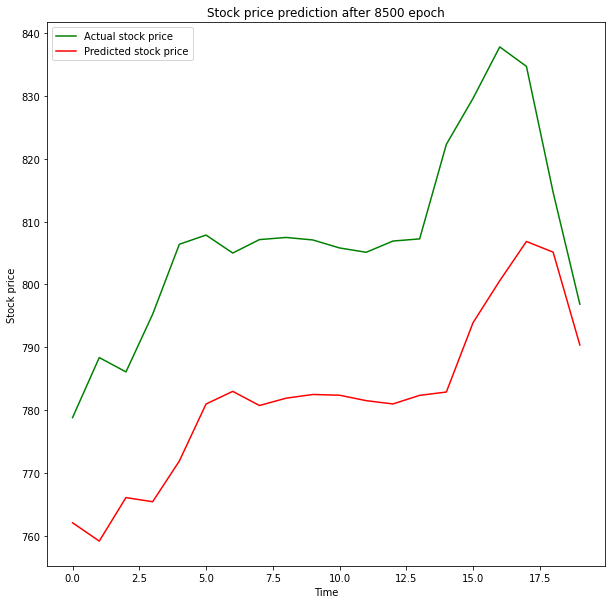

step: 8510, loss: 0.000152
step: 8520, loss: 0.000272
step: 8530, loss: 0.000198
step: 8540, loss: 0.000331
step: 8550, loss: 0.000104
step: 8560, loss: 0.000230
step: 8570, loss: 0.000662
step: 8580, loss: 0.000192
step: 8590, loss: 0.000218
step: 8600, loss: 0.000409
Plot after 8600 steps


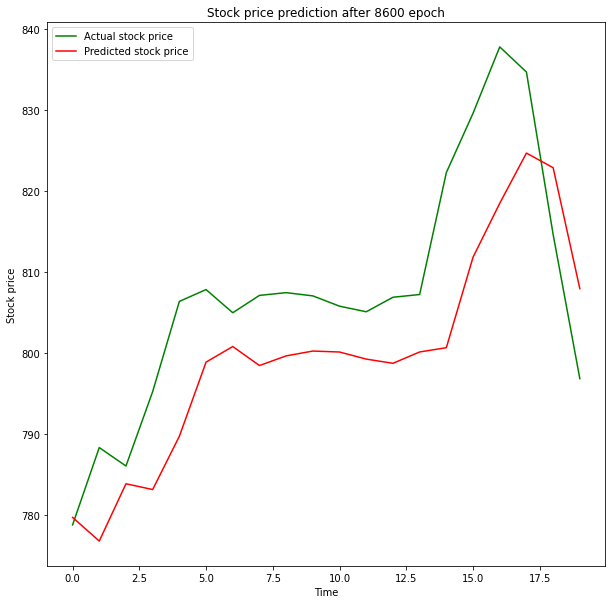

step: 8610, loss: 0.000112
step: 8620, loss: 0.000180
step: 8630, loss: 0.000393
step: 8640, loss: 0.000335
step: 8650, loss: 0.000197
step: 8660, loss: 0.000543
step: 8670, loss: 0.000383
step: 8680, loss: 0.000319
step: 8690, loss: 0.000289
step: 8700, loss: 0.000372
Plot after 8700 steps


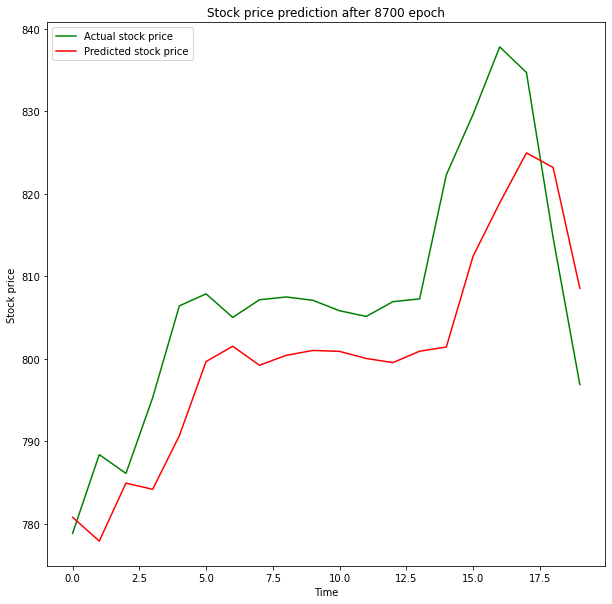

step: 8710, loss: 0.000932
step: 8720, loss: 0.000621
step: 8730, loss: 0.000264
step: 8740, loss: 0.000383
step: 8750, loss: 0.000447
step: 8760, loss: 0.000314
step: 8770, loss: 0.000068
step: 8780, loss: 0.000148
step: 8790, loss: 0.000350
step: 8800, loss: 0.000402
Plot after 8800 steps


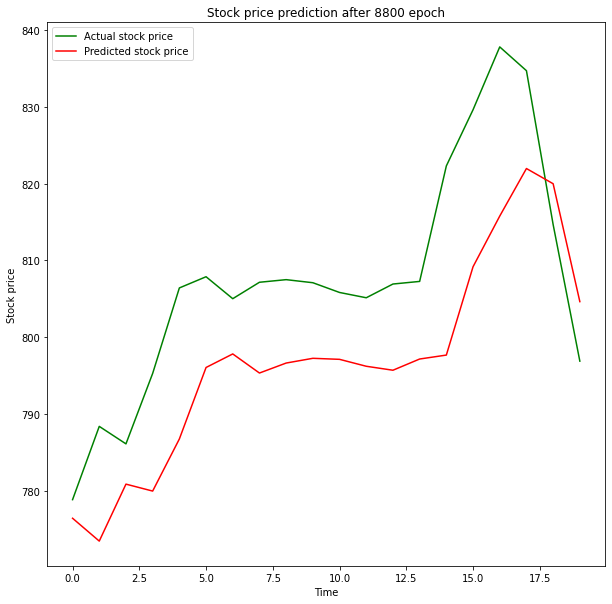

step: 8810, loss: 0.000511
step: 8820, loss: 0.000098
step: 8830, loss: 0.000261
step: 8840, loss: 0.000232
step: 8850, loss: 0.000131
step: 8860, loss: 0.000331
step: 8870, loss: 0.000107
step: 8880, loss: 0.000303
step: 8890, loss: 0.000125
step: 8900, loss: 0.000451
Plot after 8900 steps


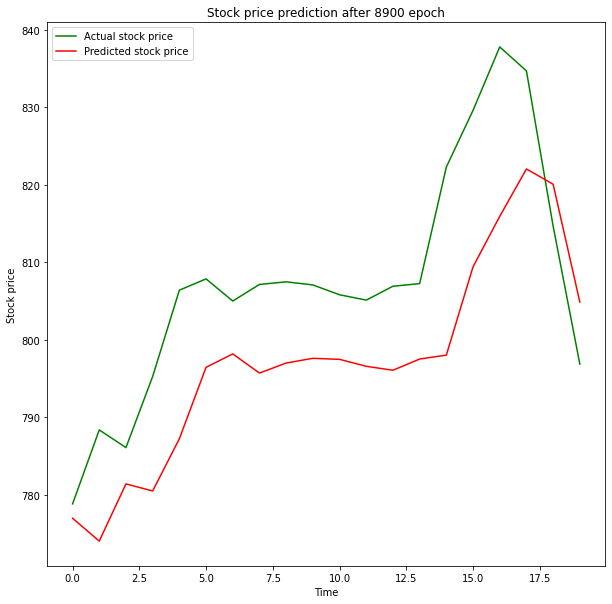

step: 8910, loss: 0.000199
step: 8920, loss: 0.000212
step: 8930, loss: 0.000179
step: 8940, loss: 0.000573
step: 8950, loss: 0.000155
step: 8960, loss: 0.000185
step: 8970, loss: 0.000372
step: 8980, loss: 0.000143
step: 8990, loss: 0.000354
step: 9000, loss: 0.000393
Plot after 9000 steps


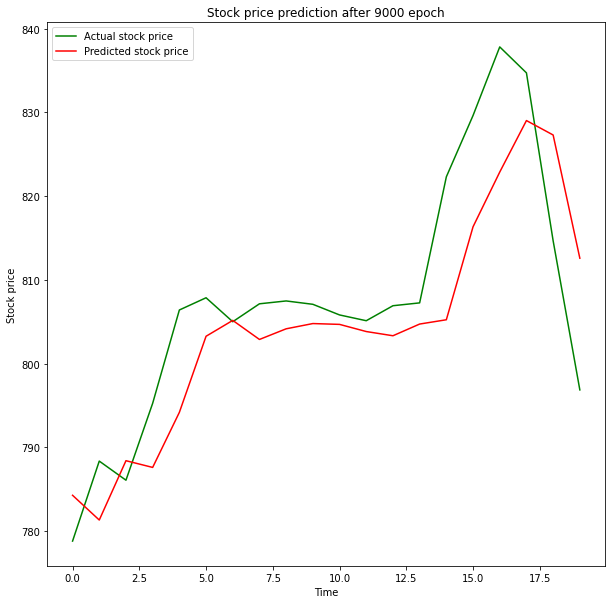

step: 9010, loss: 0.000329
step: 9020, loss: 0.000142
step: 9030, loss: 0.000247
step: 9040, loss: 0.000170
step: 9050, loss: 0.000135
step: 9060, loss: 0.000324
step: 9070, loss: 0.000122
step: 9080, loss: 0.000520
step: 9090, loss: 0.000202
step: 9100, loss: 0.000257
Plot after 9100 steps


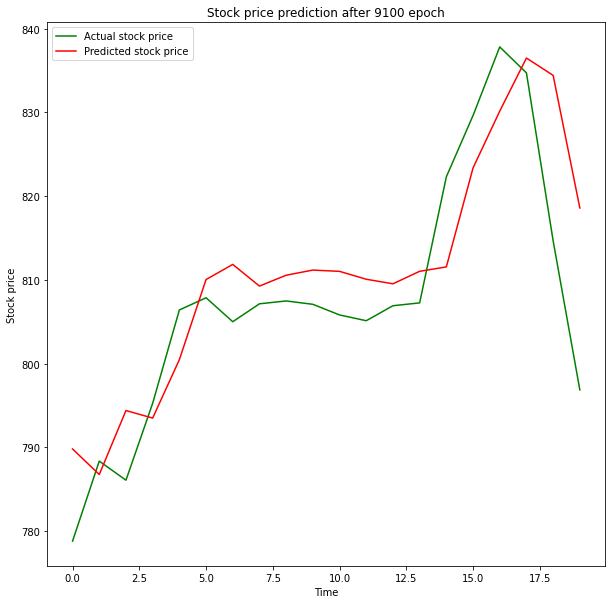

step: 9110, loss: 0.000128
step: 9120, loss: 0.000109
step: 9130, loss: 0.000395
step: 9140, loss: 0.000140
step: 9150, loss: 0.000197
step: 9160, loss: 0.000269
step: 9170, loss: 0.000139
step: 9180, loss: 0.000471
step: 9190, loss: 0.000744
step: 9200, loss: 0.000350
Plot after 9200 steps


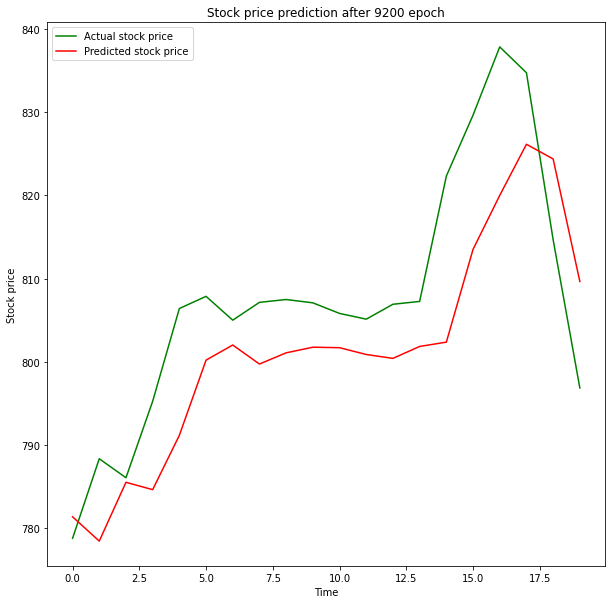

step: 9210, loss: 0.000146
step: 9220, loss: 0.000769
step: 9230, loss: 0.000446
step: 9240, loss: 0.000098
step: 9250, loss: 0.001688
step: 9260, loss: 0.000181
step: 9270, loss: 0.000066
step: 9280, loss: 0.000155
step: 9290, loss: 0.000083
step: 9300, loss: 0.000111
Plot after 9300 steps


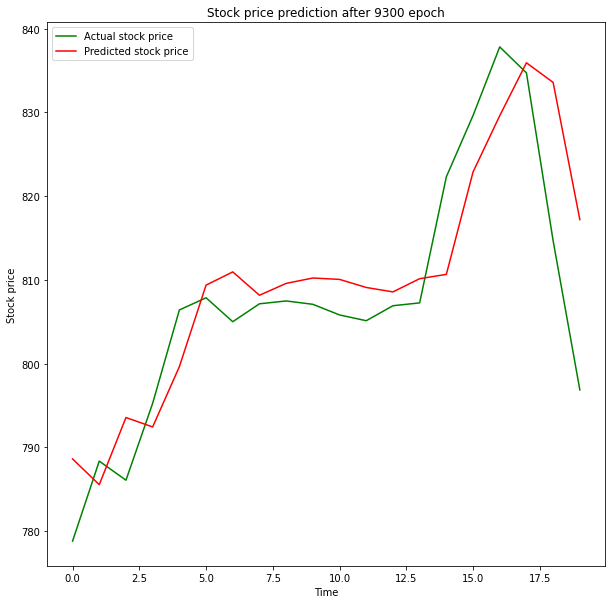

step: 9310, loss: 0.000225
step: 9320, loss: 0.001119
step: 9330, loss: 0.000125
step: 9340, loss: 0.000096
step: 9350, loss: 0.000351
step: 9360, loss: 0.001260
step: 9370, loss: 0.000287
step: 9380, loss: 0.000206
step: 9390, loss: 0.000438
step: 9400, loss: 0.000163
Plot after 9400 steps


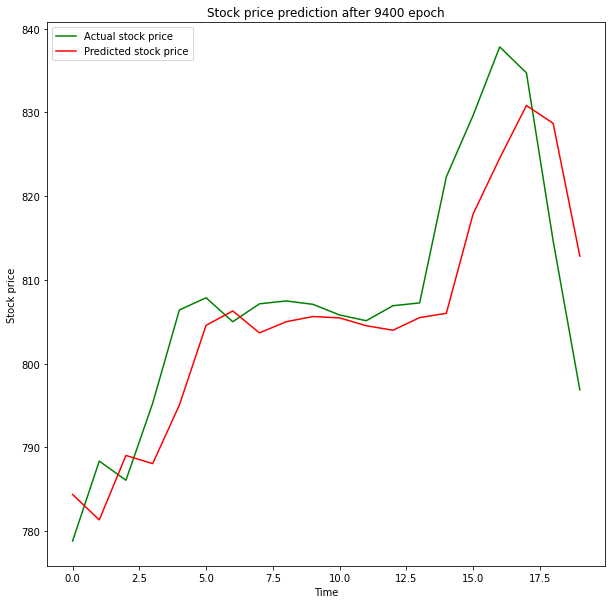

step: 9410, loss: 0.000111
step: 9420, loss: 0.000316
step: 9430, loss: 0.000232
step: 9440, loss: 0.000114
step: 9450, loss: 0.000146
step: 9460, loss: 0.000152
step: 9470, loss: 0.000125
step: 9480, loss: 0.000122
step: 9490, loss: 0.000196
step: 9500, loss: 0.000248
Plot after 9500 steps


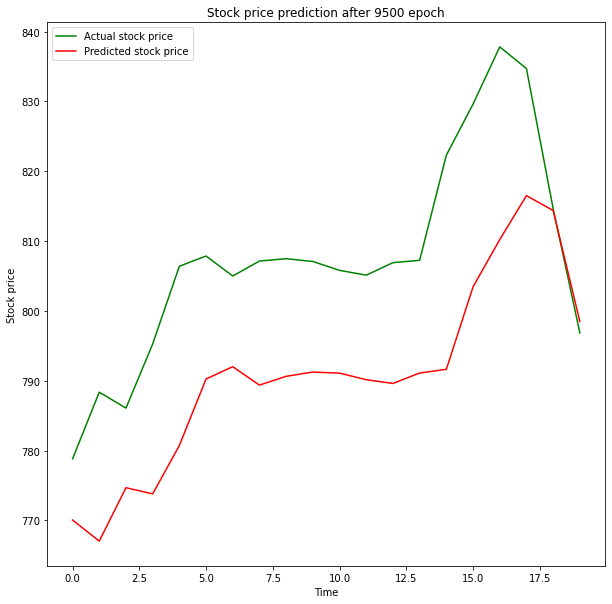

step: 9510, loss: 0.000448
step: 9520, loss: 0.001047
step: 9530, loss: 0.000276
step: 9540, loss: 0.000490
step: 9550, loss: 0.000421
step: 9560, loss: 0.000342
step: 9570, loss: 0.000164
step: 9580, loss: 0.000083
step: 9590, loss: 0.000205
step: 9600, loss: 0.000149
Plot after 9600 steps


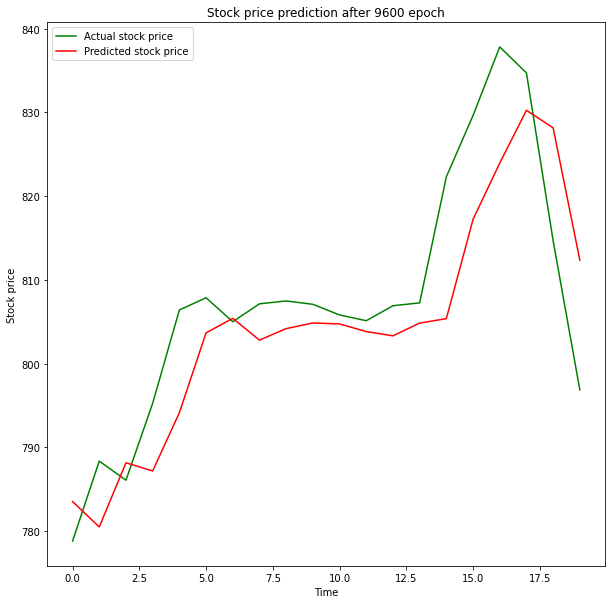

step: 9610, loss: 0.000336
step: 9620, loss: 0.000403
step: 9630, loss: 0.000124
step: 9640, loss: 0.000389
step: 9650, loss: 0.000156
step: 9660, loss: 0.000222
step: 9670, loss: 0.000307
step: 9680, loss: 0.000297
step: 9690, loss: 0.000201
step: 9700, loss: 0.000294
Plot after 9700 steps


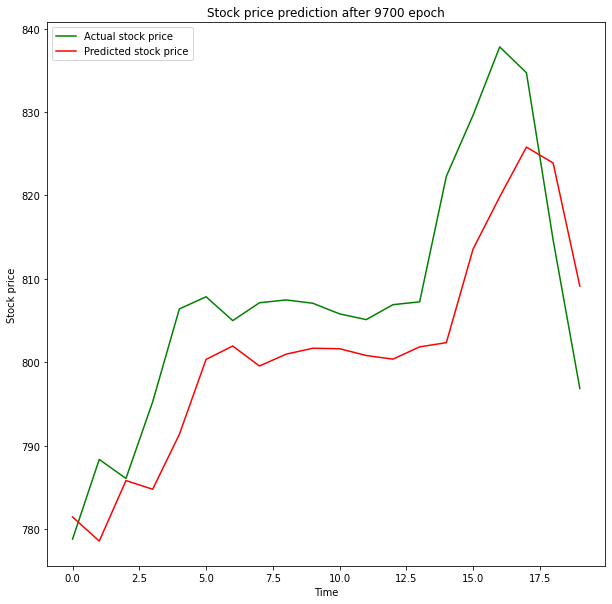

step: 9710, loss: 0.000192
step: 9720, loss: 0.000303
step: 9730, loss: 0.000204
step: 9740, loss: 0.000097
step: 9750, loss: 0.000307
step: 9760, loss: 0.000326
step: 9770, loss: 0.000166
step: 9780, loss: 0.000385
step: 9790, loss: 0.000259
step: 9800, loss: 0.000312
Plot after 9800 steps


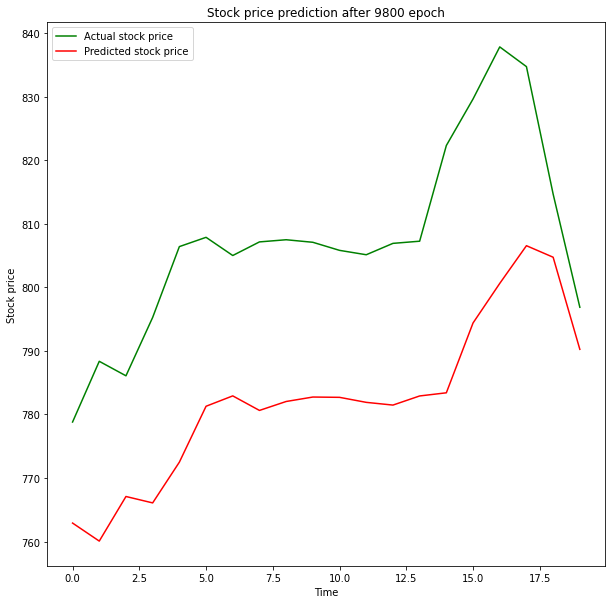

step: 9810, loss: 0.000277
step: 9820, loss: 0.000140
step: 9830, loss: 0.000084
step: 9840, loss: 0.000565
step: 9850, loss: 0.000183
step: 9860, loss: 0.000358
step: 9870, loss: 0.000249
step: 9880, loss: 0.000288
step: 9890, loss: 0.000338
step: 9900, loss: 0.000192
Plot after 9900 steps


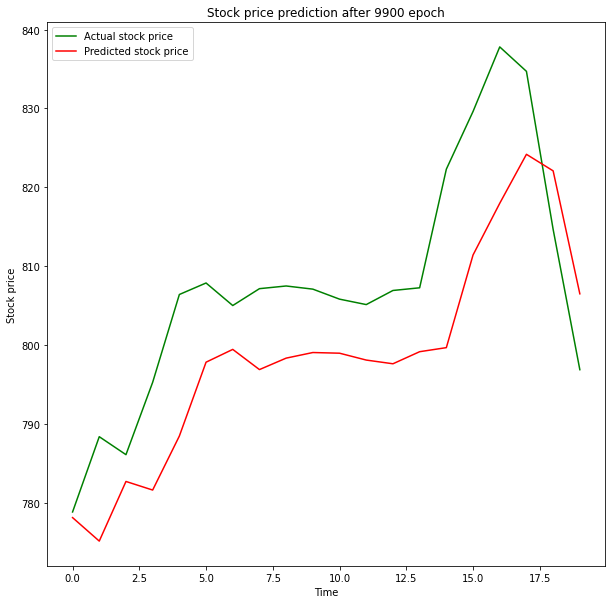

step: 9910, loss: 0.000235
step: 9920, loss: 0.000414
step: 9930, loss: 0.000073
step: 9940, loss: 0.000065
step: 9950, loss: 0.000082
step: 9960, loss: 0.000252
step: 9970, loss: 0.000055
step: 9980, loss: 0.000582
step: 9990, loss: 0.000375
step: 10000, loss: 0.000414
Plot after 10000 steps


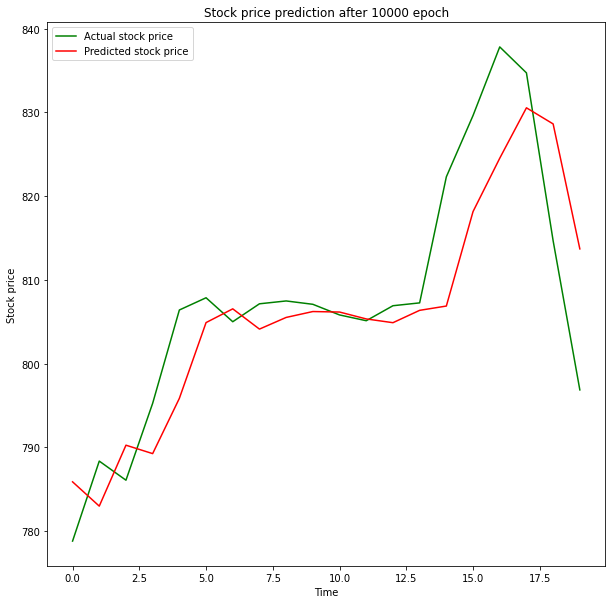

In [55]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(10000), 1):
    # Run the optimization to update W and b values.
    train(tf.reshape(batch_x,[20,60,1]), batch_y)
    
    if step%10 == 0:
        pred = rnn(tf.reshape(batch_x,[20,60,1]), is_training=True)
        loss = loss_func(pred, batch_y)
        print("step: %i, loss: %f" % (step, loss))
    if(step%100 == 0):
        show_pred(step)
        
#     break

In [70]:
X_test.shape

(20, 60, 1)

In [73]:
predicted

[]

In [74]:
test_tensor

<tf.Tensor: shape=(20, 60, 1), dtype=float64, numpy=
array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])>

In [54]:
def show_pred(n):
    print(f"Plot after {n} steps")
    pred = rnn(tf.reshape(test_tensor,[20,60,1]), is_training=True)
    predicted_stock_price = sc.inverse_transform(pred)
    plt.figure(figsize=(10,10))
    plt.plot(dataTest.Open, label = "Actual stock price", color = "green")
    plt.plot(predicted_stock_price ,label= "Predicted stock price", color = "red")
    plt.title(f"Stock price prediction after {n} epoch")
    plt.xlabel("Time")
    plt.ylabel("Stock price")
    plt.legend()
    plt.savefig(f"stock_step_{n}.png")
    plt.show()